In [2]:
# loading libraries

library(ggplot2)
library(glue)
library(tidyverse)
library(gridExtra)
library(latex2exp)
library(moments)
library(rjags)

In [3]:
# plot settings

std_width  <- 12
std_height <- 8
options(repr.plot.width = std_width, repr.plot.height = std_height)

In [4]:
# plot colours

color_palette <- c( "#58508d",
                    "#bc5090",
                    "#ff6361",
                    "#ffa600",
                    "#003f5c" 
                    )

# Exercise 1

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.

Considering the following to sets of observations taken over a fixed large time interval in two different corps:

| $y$ | $0$ | $1$ | $2$ | $3$ | $4$ | $\ge 5$ |
| -- | -- | -- | -- | -- | -- | -- |
| $n_1$ | $109$ | $65$ | $22$ | $3$ | $1$ | $0$ |
| $n_2$ | $144$ | $91$ | $32$ | $11$ | $2$ | $0$ |

where $y$ is the number of soldiers dead by horse kick, $n_1$ are the observations (i.e., counts) among the first army corp and $n_2$ the observations among the second.

#### 1. Assuming a uniform prior, compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

First, we want to analyze the two measurements set, respectively for the first and the second army corp, separately, then compare the results of the analysis.

From Bayes' theorem, the posterior distribution for $\lambda$, the rate over the measurement time, can be expressed as

$$ P(\lambda | {y_i}, H) = \frac{P(\{y_i\}|\lambda, H) P(\lambda|H)}{ \int P(\{y_i\}|\lambda, H) P(\lambda|H) d\lambda} $$

where $\{y_i\}$ are our measurement (in the first or in the second army corp) and $H$ is the hypothesis that our data follows a Poisson distribution.

The appropriate likelihood is a $\text{Gamma}$ distribution function

$$ \text{Gamma}(y|\alpha, n) = k y^{\alpha -1}e^{-n y}$$

with $k = \frac{n^\alpha}{\Gamma(\alpha)}$, the normalization constant, $\alpha = \sum_i y_i + 1$ and $n$ the number of our measurements, for the first or the second army corp.

If we assume a uniform prior for $\lambda$, then, the posterior distribution for $\lambda$ is a Gamma distribution (normalized by definition):

$$ \text{Gamma}(\lambda|\alpha, n) = k \lambda^{\alpha -1}e^{-n \lambda} $$

with $k = \frac{n^\alpha}{\Gamma(\alpha)}$, the normalization constant, $\alpha = \sum_i y_i + 1$ and $n$ the number of our measurements, for the first or the second army corp.

In [5]:
# data

# number of death soldiers
y <- c(0,1,2,3,4,5)

# counts
n1 <- c(109, 65, 22, 3, 1, 0)
n2 <- c(144, 91, 32, 11, 2, 0)

# measurements
y1 <- c()
y2 <- c()
for(y in y) {
    y1 <- c( y1, rep(y, n1[y+1]))
    y2 <- c( y2, rep(y, n2[y+1]))
}

In [6]:
# gamma posteriors parameters

alpha1 <- sum(y1) + 1
alpha2 <- sum(y2) + 1

npost1 <- length(y1)
npost2 <- length(y2)

cat(glue("The total number of measurement is {npost1} for the first army corp and {npost2} for the second army corp."))

The total number of measurement is 200 for the first army corp and 280 for the second army corp.

In [7]:
# lambda values
lambda <- seq(0.3, 1.2, 0.001)

In [8]:
# gamma posteriors distributions

gamma_post1 <- dgamma(x = lambda, shape = alpha1, rate = npost1)
gamma_post2 <- dgamma(x = lambda, shape = alpha2, rate = npost2)

The expected value for a $\text{Gamma}$ distribution is

$$ E[X] = \frac{\alpha}{n} $$

and the variance is

$$ \text{var}[x] = \frac{\alpha}{n^2} $$

In [9]:
# theoretical means
mean_th_gamma1 <- alpha1/npost1
mean_th_gamma2 <- alpha2/npost2

# theoretical variances
var_th_gamma1 <- alpha1/(npost1**2)
var_th_gamma2 <- alpha2/(npost2**2)

cat("The mean and the variance of the posterior distribution for the death rate, calculated from theory, are respectively:")
cat("\n")
cat("  - for the first army corps")
cat("\n")
cat(glue("\t mean: {round(mean_th_gamma1, 3)} \t variance: {round(var_th_gamma1, 3)}"))
cat("\n")
cat("  - for the second army corps")
cat("\n")
cat(glue("\t mean: {round(mean_th_gamma2, 3)} \t variance: {round(var_th_gamma2, 3)}"))

The mean and the variance of the posterior distribution for the death rate, calculated from theory, are respectively:
  - for the first army corps
	 mean: 0.615 	 variance: 0.003
  - for the second army corps
	 mean: 0.704 	 variance: 0.003

In [10]:
# means from distributions
mean_gamma1 <- integrate(function(x) dgamma(x, alpha1, rate = npost1)*x, 0.3, 1.2)
mean_gamma2 <- integrate(function(x) dgamma(x, alpha2, rate = npost2)*x, 0.3, 1.2)

# variances from distributions
var_gamma1 <- integrate(function(x) dgamma(x, alpha1, rate = npost1)*(x-mean_gamma1$value)**2, 0.3, 1.2)
var_gamma2 <- integrate(function(x) dgamma(x, alpha2, rate = npost2)*(x-mean_gamma2$value)**2, 0.3, 1.2)

# medians from distributions
med_lambda_1 <- qgamma(0.5, shape = alpha1, rate = npost1)
med_lambda_2 <- qgamma(0.5, shape = alpha2, rate = npost2)

cat("The mean, the variance and the median of the posterior distribution for the death rate are respectively:")
cat("\n")
cat("  - for the first army corps")
cat("\n")
cat(glue("\t mean: {round(mean_gamma1$value, 4)} \t variance: {round(var_gamma1$value, 4)} \t median: {round(med_lambda_1,4)}"))
cat("\n")
cat("  - for the second army corps")
cat("\n")
cat(glue("\t mean: {round(mean_gamma2$value, 4)} \t variance: {round(var_gamma2$value, 4)} \t median: {round(med_lambda_2,4)}"))


The mean, the variance and the median of the posterior distribution for the death rate are respectively:
  - for the first army corps
	 mean: 0.615 	 variance: 0.0031 	 median: 0.6133
  - for the second army corps
	 mean: 0.7036 	 variance: 0.0025 	 median: 0.7024

In [11]:
# 95% CI

Alpha <- 0.05
lowLim <- Alpha / 2
upLim <- 1- Alpha / 2

lambda_min1 <- qgamma(lowLim, shape = alpha1, rate = npost1)
lambda_min2 <- qgamma(lowLim, shape = alpha2, rate = npost2)

lambda_max1 <- qgamma(upLim, shape = alpha1, rate = npost1)
lambda_max2 <- qgamma(upLim, shape = alpha2, rate = npost2)

cat(glue("95% CI, first army corp: {round(lambda_min1,3)} - {round(lambda_max1, 3)}"))
cat("\n")
cat(glue("95% CI, second army corp: {round(lambda_min2,3)} - {round(lambda_max2, 3)}"))

95% CI, first army corp: 0.511 - 0.728
95% CI, second army corp: 0.609 - 0.805

In [12]:
# plots 

plot_post_gamma1 <- ggplot() + 
                    geom_area(
                    aes(
                        x = lambda[lambda > lambda_min1 & lambda < lambda_max1],
                        y = gamma_post1[lambda > lambda_min1 & lambda < lambda_max1],
                        fill = "95% CI"
                    ),
                    alpha = 0.4
                    ) +
                    geom_line(
                        aes(
                            x = lambda, 
                            y = gamma_post1,
                            color = "Posterior"
                            ),
                        linewidth = 1.5
                    ) + 
                    geom_segment(
                        aes(
                            x = mean_gamma1$value,
                            y = 0,
                            xend = mean_gamma1$value,
                            yend = 8,
                            color = "Mean = 0.615"
                        ),
                        linetype = "longdash",
                        linewidth = 1
                    ) + 
                    geom_segment(
                        aes( x = lambda_min1, y = 0, xend = lambda_min1, yend = 8),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( x = lambda_max1, y = 0, xend = lambda_max1, yend = 8),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    )

plot_post_gamma1 <- plot_post_gamma1 +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 24, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = TeX("$\\lambda$"), 
              y = "probability density", 
              title = "Posterior distribution for the first army corp - uniform prior " ) +
        scale_color_manual(name = "", 
                        values = c("Posterior" = color_palette[1], "Mean = 0.615" = color_palette[3])) + 
        scale_fill_manual( name = "",
                           values = c("95% CI" = color_palette[4])) +
        scale_x_continuous(n.breaks = 15) 

In [13]:
plot_post_gamma2 <- ggplot() + 
                    geom_area(
                    aes(
                        x = lambda[lambda > lambda_min2 & lambda < lambda_max2],
                        y = gamma_post2[lambda > lambda_min2 & lambda < lambda_max2],
                        fill = "95% CI"
                    ),
                    alpha = 0.4
                    ) +
                    geom_line(
                        aes(
                            x = lambda, 
                            y = gamma_post2,
                            color = "Posterior"
                            ),
                        linewidth = 1.5
                    ) + 
                    geom_segment(
                        aes(
                            x = mean_gamma2$value,
                            y = 0,
                            xend = mean_gamma2$value,
                            yend = 9,
                            color = "Mean = 0.704"
                        ),
                        linetype = "longdash",
                        linewidth = 1
                    ) + 
                    geom_segment(
                        aes( x = lambda_min2, y = 0, xend = lambda_min2, yend = 9),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( x = lambda_max2, y = 0, xend = lambda_max2, yend = 9),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    )

plot_post_gamma2 <- plot_post_gamma2 +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 24, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = TeX("$\\lambda$"), 
              y = "probability density", 
              title = "Posterior distribution for the second army corp - uniform prior " ) +
        scale_color_manual(name = "", 
                        values = c("Posterior" = color_palette[1], "Mean = 0.704" = color_palette[3])) + 
        scale_fill_manual( name = "",
                           values = c("95% CI" = color_palette[4])) +
        scale_x_continuous(n.breaks = 15) +
        scale_y_continuous(n.breaks = 6)

#### 2. Assuming Jeffreys' prior, compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the $95\%$ CI.

Proceeding in a similar way as in the previous point, we have that the likelihood is a $\text{Gamma}$ distribution function and if we assume Jeffreys prior for $\lambda$, that is

$$ g(\lambda) = \frac{1}{\sqrt{\lambda}}$$

with $\lambda > 0$, we have that the posterior distribution for $\lambda$ is again a $\text{Gamma}$:

$$ \text{Gamma}(\lambda|\alpha, n) = k \lambda^{\alpha -1}e^{-n \lambda} $$

with $k$ the normalization constant, $\alpha = \sum_j y_j + \frac{1}{2}$ and $n$ the total number of measurement.

In [14]:
# gamma posterior parameters

alpha1_j <- sum(y1) + 1/2
alpha2_j <- sum(y2) + 1/2

In [15]:
# gamma posterior distributions

gamma_post1_j <- dgamma(x = lambda, shape = alpha1_j, rate = npost1)
gamma_post2_j <- dgamma(x = lambda, shape = alpha2_j, rate = npost2)

In [16]:
# theoretical means
mean_th_gamma1_j <- alpha1_j/npost1
mean_th_gamma2_j <- alpha2_j/npost2

# theoretical variances
var_th_gamma1_j <- alpha1_j/(npost1**2)
var_th_gamma2_j <- alpha2_j/(npost2**2)

cat("The mean and the variance of the posterior distribution for the death rate, calculated from theory, are respectively:")
cat("\n")
cat("  - for the first army corps")
cat("\n")
cat(glue("\t mean: {round(mean_th_gamma1_j, 4)} \t variance: {round(var_th_gamma1_j, 4)}"))
cat("\n")
cat("  - for the second army corps")
cat("\n")
cat(glue("\t mean: {round(mean_th_gamma2_j, 4)} \t variance: {round(var_th_gamma2_j, 4)}"))

The mean and the variance of the posterior distribution for the death rate, calculated from theory, are respectively:
  - for the first army corps
	 mean: 0.6125 	 variance: 0.0031
  - for the second army corps
	 mean: 0.7018 	 variance: 0.0025

In [17]:
# means from distributions
mean_gamma1_j <- integrate(function(x) dgamma(x, alpha1_j, rate = npost1)*x, 0.3, 1.2)
mean_gamma2_j <- integrate(function(x) dgamma(x, alpha2_j, rate = npost2)*x, 0.3, 1.2)

# variances from distributions
var_gamma1_j <- integrate(function(x) dgamma(x, alpha1_j, rate = npost1)*(x-mean_gamma1_j$value)**2, 0.3, 1.2)
var_gamma2_j <- integrate(function(x) dgamma(x, alpha2_j, rate = npost2)*(x-mean_gamma2_j$value)**2, 0.3, 1.2)

# medians from distributions
med_lambda_1_j <- qgamma(0.5, shape = alpha1_j, rate = npost1)
med_lambda_2_j <- qgamma(0.5, shape = alpha2_j, rate = npost2)

cat("The mean, the variance and the median of the posterior distribution for the death rate are respectively:")
cat("\n")
cat("  - for the first army corps")
cat("\n")
cat(glue("\t mean: {round(mean_gamma1_j$value, 4)} \t variance: {round(var_gamma1_j$value, 4)} \t median: {round(med_lambda_1_j, 4)}"))
cat("\n")
cat("  - for the second army corps")
cat("\n")
cat(glue("\t mean: {round(mean_gamma2_j$value, 4)} \t variance: {round(var_gamma2_j$value, 4)} \t median: {round(med_lambda_2_j, 4)}"))

The mean, the variance and the median of the posterior distribution for the death rate are respectively:
  - for the first army corps
	 mean: 0.6125 	 variance: 0.0031 	 median: 0.6108
  - for the second army corps
	 mean: 0.7018 	 variance: 0.0025 	 median: 0.7006

In [18]:
# 95% CI

lambda_min1_j <- qgamma(lowLim, shape = alpha1_j, rate = npost1)
lambda_min2_j <- qgamma(lowLim, shape = alpha2_j, rate = npost2)

lambda_max1_j <- qgamma(upLim, shape = alpha1_j, rate = npost1)
lambda_max2_j <- qgamma(upLim, shape = alpha2_j, rate = npost2)

cat(glue("95% CI, first army corp: {round(lambda_min1_j,3)} - {round(lambda_max1_j,3)}"))
cat("\n")
cat(glue("95% CI, second army corp: {round(lambda_min2_j,3)} - {round(lambda_max2_j,3)}"))

95% CI, first army corp: 0.509 - 0.726
95% CI, second army corp: 0.607 - 0.803

In [19]:
# plots 

plot_post_gamma1_j <- ggplot() + 
                    geom_area(
                    aes(
                        x = lambda[lambda > lambda_min1_j & lambda < lambda_max1_j],
                        y = gamma_post1_j[lambda > lambda_min1_j & lambda < lambda_max1_j],
                        fill = "95% CI"
                    ),
                    alpha = 0.4
                    ) +
                    geom_line(
                        aes(
                            x = lambda, 
                            y = gamma_post1_j,
                            color = "Posterior"
                            ),
                        linewidth = 1.5
                    ) + 
                    geom_line(
                        aes(
                            x = lambda,
                            y = 1/sqrt(lambda),
                            color = "Jeffreys prior"
                        ),
                        linewidth = 1.5
                    ) +
                    geom_segment(
                        aes(
                            x = mean_gamma1_j$value,
                            y = 0,
                            xend = mean_gamma1_j$value,
                            yend = 8,
                            color = "Mean = 0.613"
                        ),
                        linetype = "longdash",
                        linewidth = 1
                    ) + 
                    geom_segment(
                        aes( x = lambda_min1_j, y = 0, xend = lambda_min1_j, yend = 8),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( x = lambda_max1_j, y = 0, xend = lambda_max1_j, yend = 8),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    )

plot_post_gamma1_j <- plot_post_gamma1_j +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 24, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = TeX("$\\lambda$"), 
              y = "probability density", 
              title = "Posterior distribution for the first army corp - Jeffreys prior " ) +
        scale_color_manual(name = "", 
                        values = c(
                            "Posterior" = color_palette[1], 
                            "Jeffreys prior" = color_palette[2], 
                            "Mean = 0.613" = color_palette[3]
                            )
                        ) + 
        scale_fill_manual( name = "",
                           values = c("95% CI" = color_palette[4])) +
        scale_x_continuous(n.breaks = 15) 

In [20]:
plot_post_gamma2_j <- ggplot() + 
                    geom_area(
                    aes(
                        x = lambda[lambda > lambda_min2_j & lambda < lambda_max2_j],
                        y = gamma_post2_j[lambda > lambda_min2_j & lambda < lambda_max2_j],
                        fill = "95% CI"
                    ),
                    alpha = 0.4
                    ) +
                    geom_line(
                        aes(
                            x = lambda, 
                            y = gamma_post2_j,
                            color = "Posterior"
                            ),
                        linewidth = 1.5
                    ) + 
                    geom_line(
                        aes(
                            x = lambda,
                            y = 1/sqrt(lambda),
                            color = "Jeffreys prior"
                        ),
                        linewidth = 1.5
                    ) +
                    geom_segment(
                        aes(
                            x = mean_gamma2_j$value,
                            y = 0,
                            xend = mean_gamma2_j$value,
                            yend = 9,
                            color = "Mean = 0.702"
                        ),
                        linetype = "longdash",
                        linewidth = 1
                    ) + 
                    geom_segment(
                        aes( x = lambda_min2_j, y = 0, xend = lambda_min2_j, yend = 9),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( x = lambda_max2_j, y = 0, xend = lambda_max2_j, yend = 9),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    )

plot_post_gamma2_j <- plot_post_gamma2_j +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 24, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = TeX("$\\lambda$"), 
              y = "probability density", 
              title = "Posterior distribution for the second army corp - Jeffreys prior " ) +
        scale_color_manual(name = "", 
                        values = c(
                            "Posterior" = color_palette[1], 
                            "Jeffreys prior" = color_palette[2], 
                            "Mean = 0.702" = color_palette[3]
                            )
                        ) + 
        scale_fill_manual( name = "",
                           values = c("95% CI" = color_palette[4])) +
        scale_x_continuous(n.breaks = 15) +
        scale_y_continuous(n.breaks = 6)

We summarize our results:

In [21]:
# adjusting plot settings

std_width  <- 22
std_height <- 12
options(repr.plot.width = std_width, repr.plot.height = std_height)

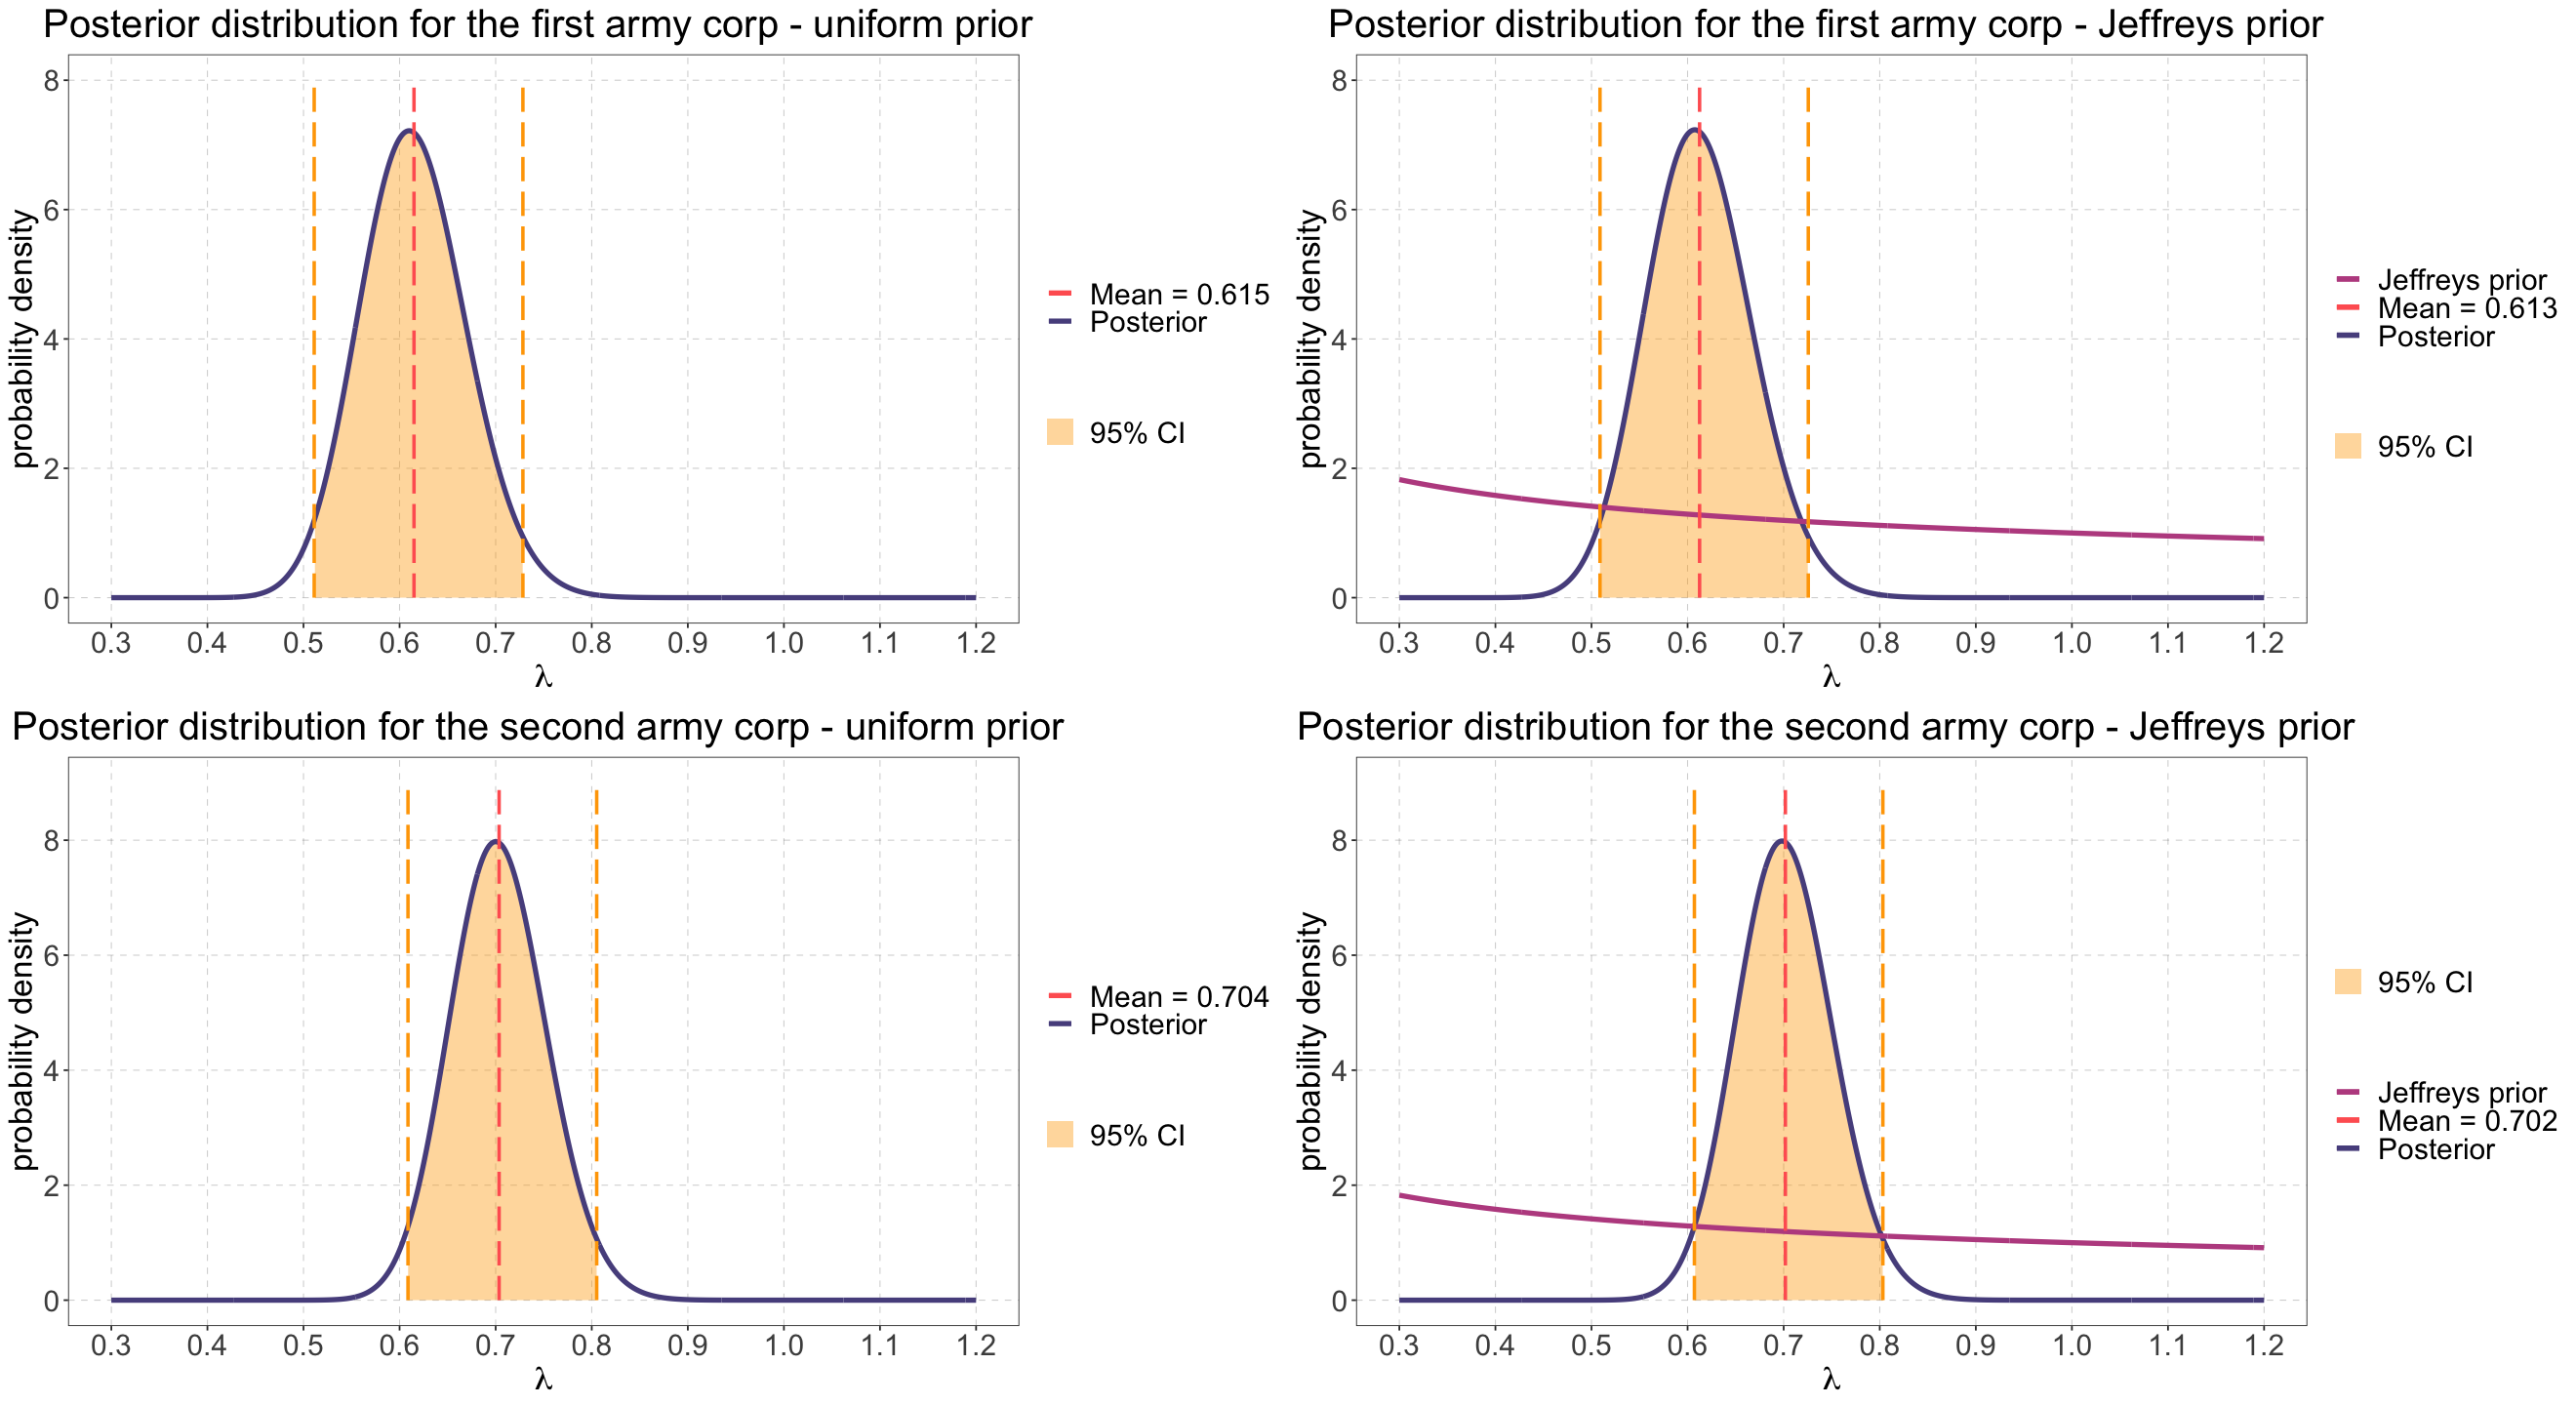

In [22]:
grid.arrange(plot_post_gamma1, plot_post_gamma1_j, plot_post_gamma2, plot_post_gamma2_j, ncol = 2, nrow = 2)

We can observe that the posterior distributions for the measurement in the second army corp are more symmetrical with respect to the first, and this is because the number of measurement is higher (280 vs 200).

----------------------

# Exercise 2

#### Solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functions introduced during lectures, or using a MCMC library like JAGS.

We use JAGS to run the MCMC, specifically the R package `rjags`.

#### 1. Uniform prior

Note that, in the BUG model, given the results in Exercise 1, we use a $\text{Gamma}(1,0)$ distribution as a uniform distribution prior for $\lambda$ (not exacty zero for the scale parameter of the Gamma because it has to be strictly higher than zero, so we set a value very close to zero).

In [23]:
# data for the model

data1 <- NULL
# number of counts
data1$Y1 <- y1
data1$Y2 <- y2

In [26]:
# creating jags model

jm_unif <- jags.model("ex2_unif.bug", data1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 480
   Unobserved stochastic nodes: 2
   Total graph size: 484

Initializing model



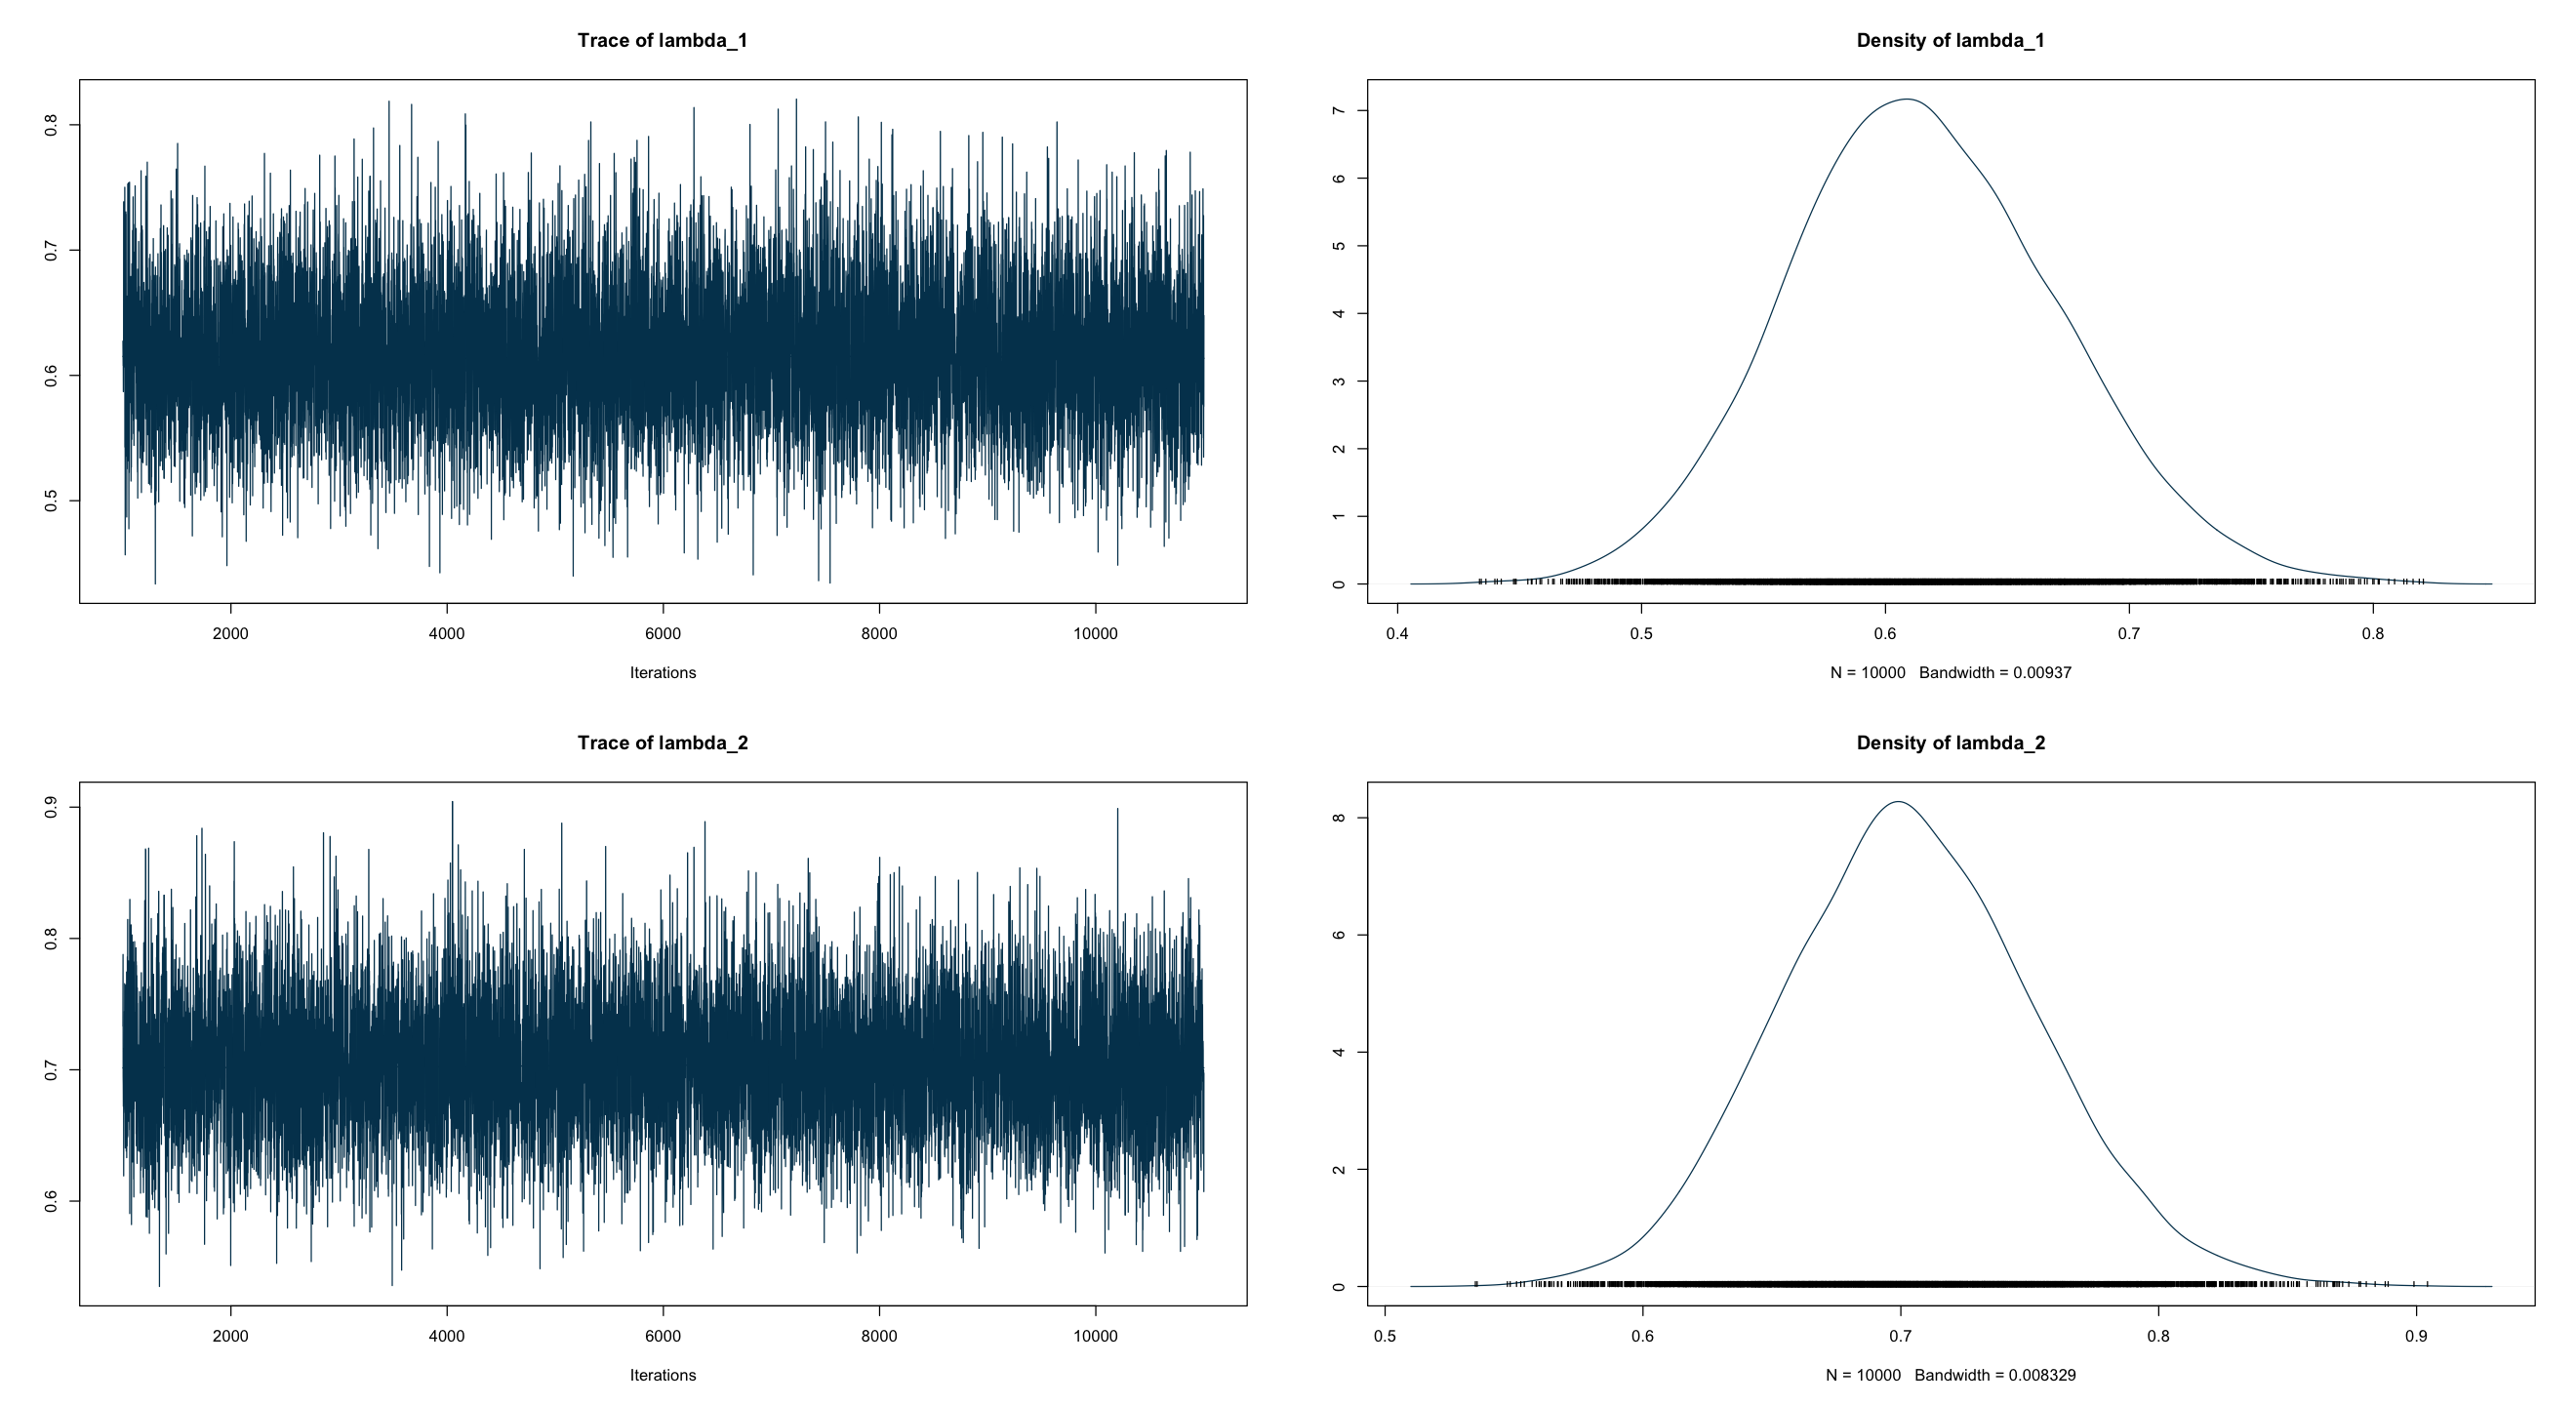

In [27]:
# update MCMC (burn-in)
update(jm_unif, 1000)

chain_unif <- coda.samples(jm_unif, c("lambda_1","lambda_2"), n.iter = 10000)
# results
plot(chain_unif, col = color_palette[5])

In [28]:
summary(chain_unif)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean      SD  Naive SE Time-series SE
lambda_1 0.6157 0.05577 0.0005577      0.0005577
lambda_2 0.7036 0.04970 0.0004970      0.0004970

2. Quantiles for each variable:

           2.5%    25%    50%    75%  97.5%
lambda_1 0.5106 0.5772 0.6135 0.6519 0.7288
lambda_2 0.6095 0.6696 0.7022 0.7360 0.8033


In [29]:
# computing variances

var1 <- 0.05585^2
var2 <- 0.04919^2
var1
var2

[1] 0.003119222

[1] 0.002419656

In [30]:
# format the chain as a dataframe

chain_unif_df <- as.data.frame(as.mcmc(chain_unif))

In [31]:
# inference on lambda plot
# with comparison with the previous analysis

plot_inf_lambda1_unif <- ggplot() +
                    geom_histogram(
                        aes(
                            x = chain_unif_df$lambda_1, 
                            y = after_stat(density),
                            fill = "Posterior sampling with MCMC"
                            ), 
                        bins = 90
                    ) + 
                    geom_line(
                        aes(
                            x = lambda, 
                            y = gamma_post1,
                            color = "Analytical posterior"
                            ),
                        linewidth = 1.5
                    ) + 
                    theme_bw() +
                    theme( legend.position = "top",
                    plot.title = element_text(size = 24, hjust = 0.5),
                    axis.title = element_text(size = 20),
                    axis.text  = element_text(size = 18),
                    legend.title = element_text(size = 20, hjust = 0.5),
                    legend.text  = element_text(size = 18),
                    panel.grid.major.y = element_line( color = alpha("black",0.2),
                                                    linewidth = 0.3,
                                                    linetype = 2 ),
                    panel.grid.major.x = element_line( color = alpha("black",0.2),
                                                    linewidth = 0.3,
                                                    linetype = 2 ),
                    panel.grid.minor = element_blank(),
                    panel.background = element_blank(),
                    legend.background = element_rect( fill = "white",
                                                    linewidth = 0.5, 
                                                    linetype = "solid", 
                                                    colour = "white" ) ) +
                    labs( x = TeX("$\\lambda$"), 
                        y = "probability density", 
                        title = "Posterior distribution for the first army corp - uniform prior " ) + 
                    scale_color_manual( name = "", values = c("Analytical posterior" = color_palette[2])) +
                    scale_fill_manual( name = "",
                           values = c("Posterior sampling with MCMC" = color_palette[1])) +
                    xlim(0.3,1)

plot_inf_lambda2_unif <- ggplot() +
                    geom_histogram(
                        aes(
                            x = chain_unif_df$lambda_2, 
                            y = after_stat(density),
                            fill = "Posterior sampling with MCMC"
                            ), 
                        bins = 90
                    ) + 
                    geom_line(
                        aes(
                            x = lambda, 
                            y = gamma_post2,
                            color = "Analytical posterior"
                            ),
                        linewidth = 1.5
                    ) + 
                    theme_bw() +
                    theme( legend.position = "top",
                    plot.title = element_text(size = 24, hjust = 0.5),
                    axis.title = element_text(size = 20),
                    axis.text  = element_text(size = 18),
                    legend.title = element_text(size = 20, hjust = 0.5),
                    legend.text  = element_text(size = 18),
                    panel.grid.major.y = element_line( color = alpha("black",0.2),
                                                    linewidth = 0.3,
                                                    linetype = 2 ),
                    panel.grid.major.x = element_line( color = alpha("black",0.2),
                                                    linewidth = 0.3,
                                                    linetype = 2 ),
                    panel.grid.minor = element_blank(),
                    panel.background = element_blank(),
                    legend.background = element_rect( fill = "white",
                                                    linewidth = 0.5, 
                                                    linetype = "solid", 
                                                    colour = "white" ) ) +
                    labs( x = TeX("$\\lambda$"), 
                        y = "probability density", 
                        title = "Posterior distribution for the second army corp - uniform prior " ) + 
                    scale_color_manual( name = "", values = c("Analytical posterior" = color_palette[2])) +
                    scale_fill_manual( name = "",
                           values = c("Posterior sampling with MCMC" = color_palette[1])) +
                    xlim(0.3,1)

#### 2. Jeffreys prior

Note that, in the BUG model, we use a $\text{Gamma}(0.5, 0)$ to approximate the Jeffreys prior on $\lambda$: in this way we obtain that the prior is $\propto \frac{1}{\sqrt{\lambda}}$. As in the previous point, we approximate the scale parameter of the Gamma distribution with a value very close to zero.

In [32]:
# creating jags model
jm_jef <- jags.model("ex2_jef.bug", data1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 480
   Unobserved stochastic nodes: 2
   Total graph size: 486

Initializing model



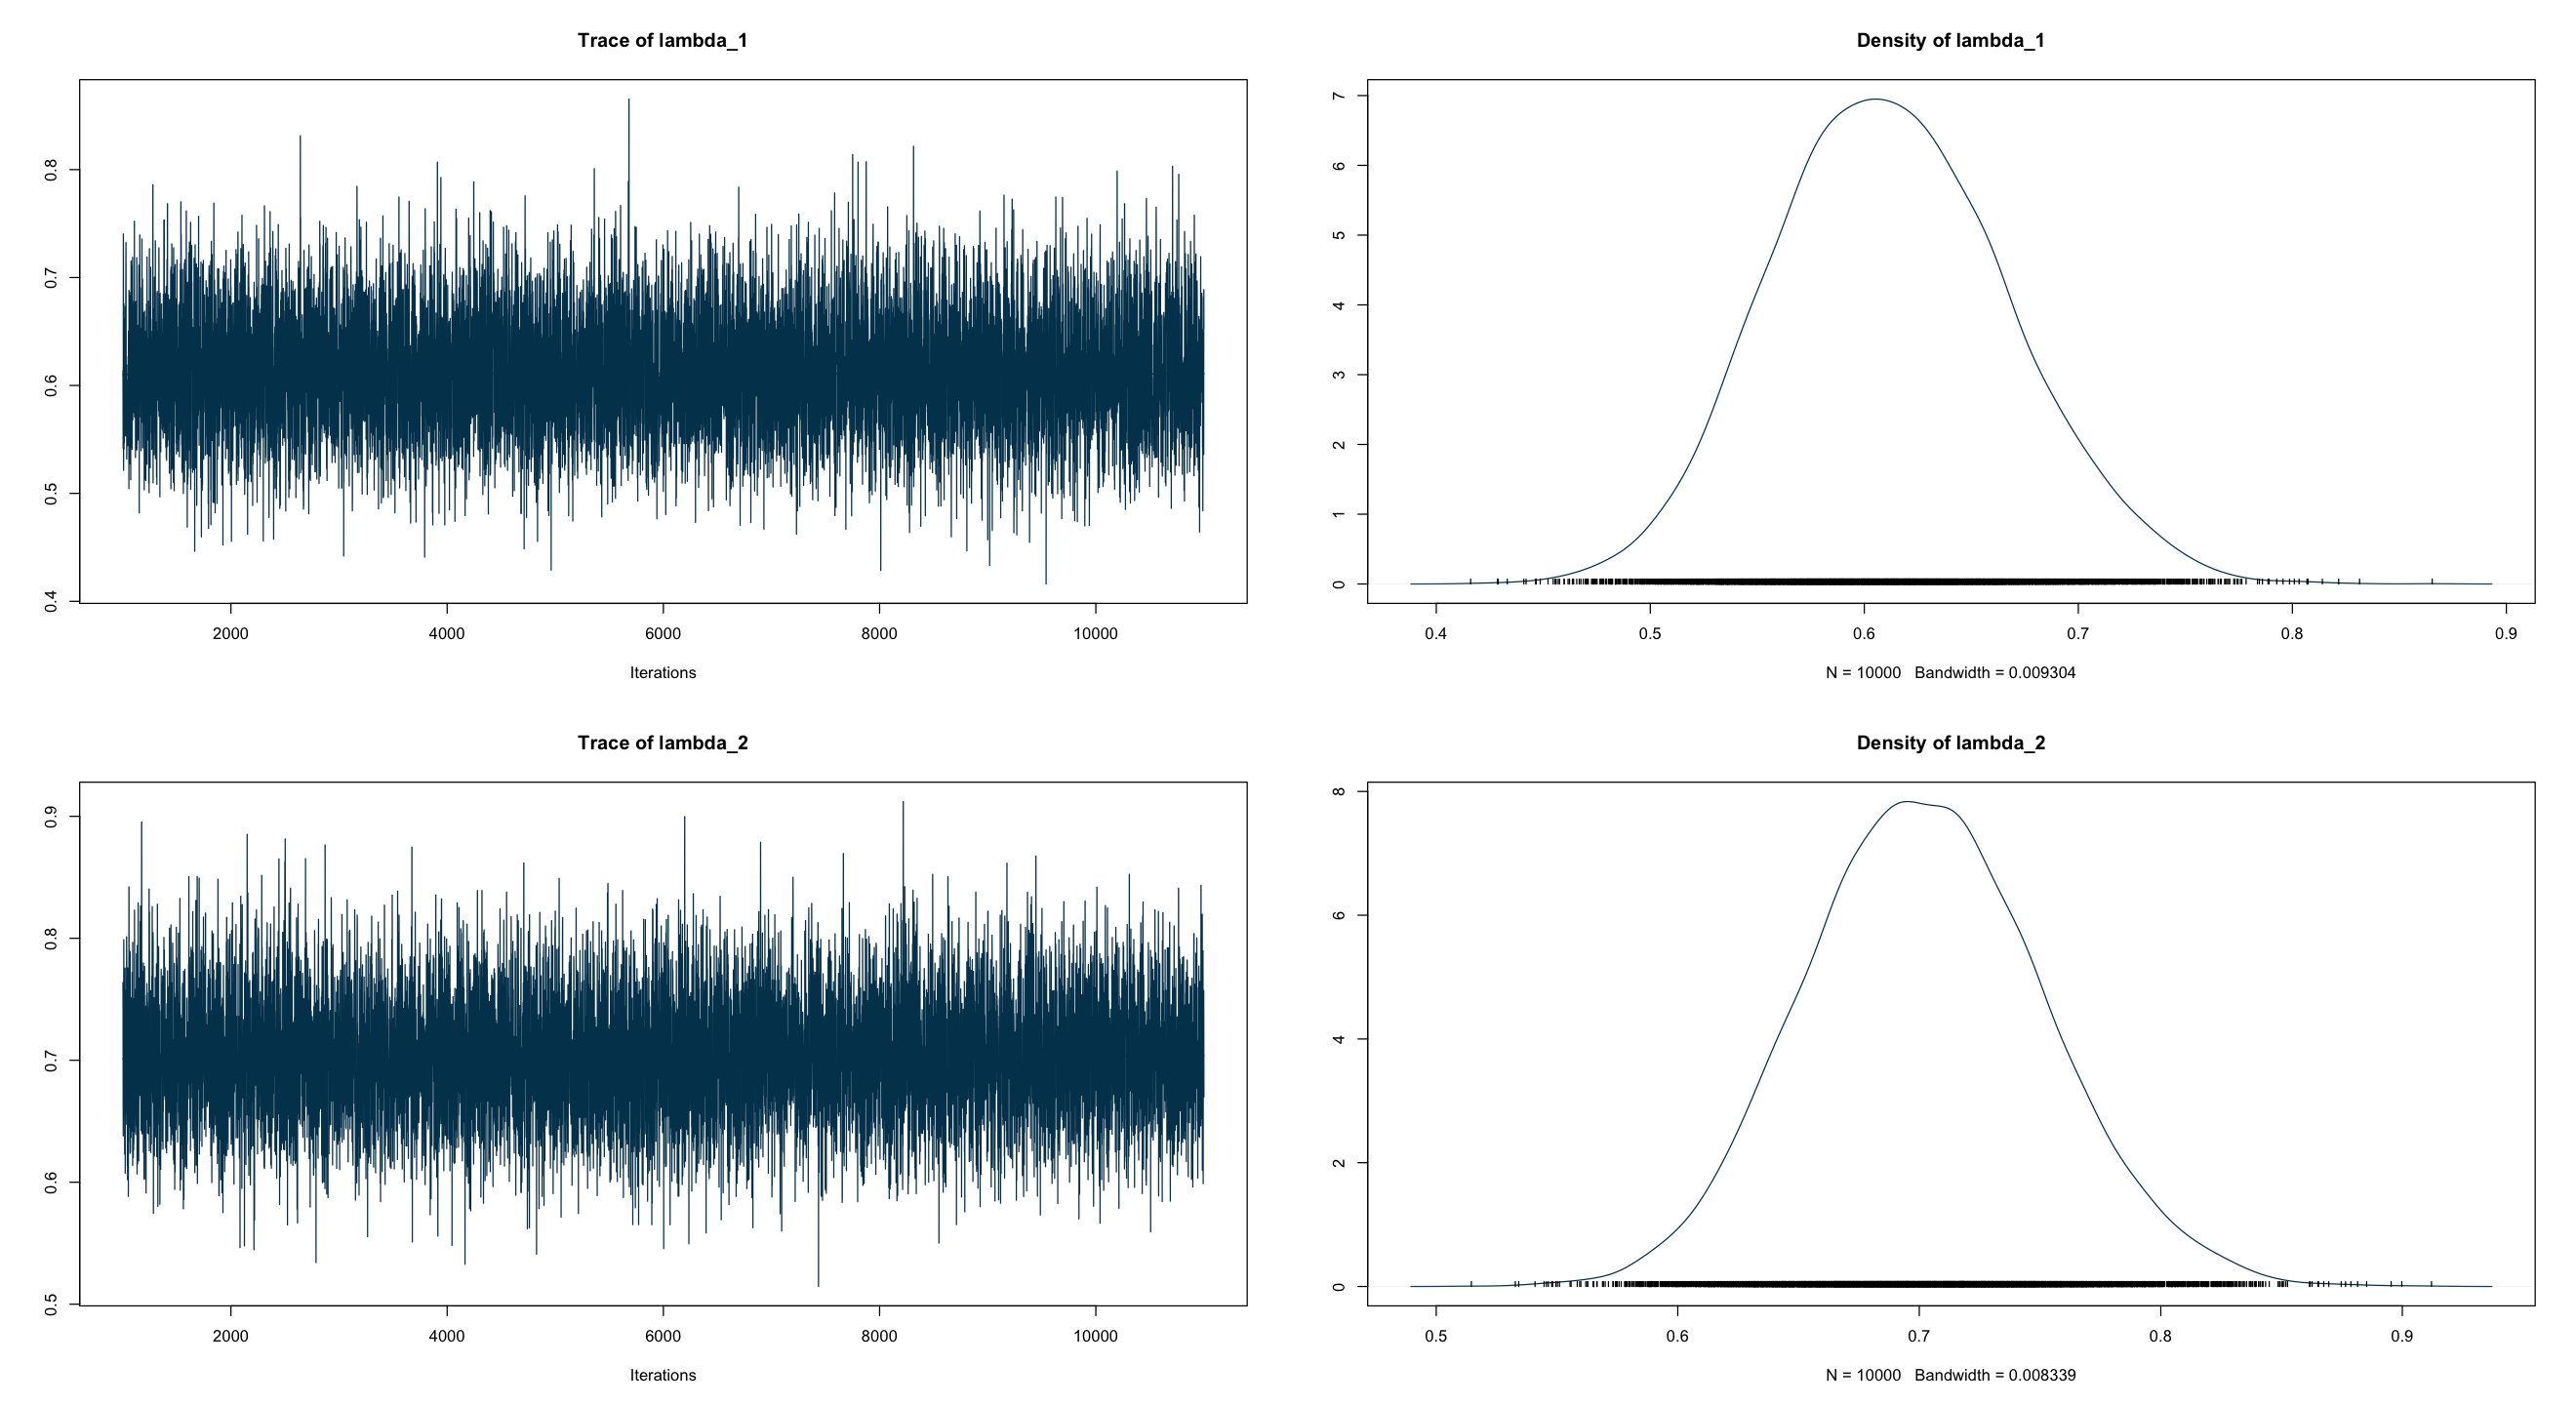

In [33]:
# update MCMC
update(jm_jef, 1000)

chain_jef <- coda.samples(jm_jef, c("lambda_1", "lambda_2"), n.iter = 10000)

# results
plot(chain_jef, col = color_palette[5])

In [34]:
summary(chain_jef)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean      SD  Naive SE Time-series SE
lambda_1 0.6120 0.05538 0.0005538      0.0005370
lambda_2 0.7022 0.04964 0.0004964      0.0004964

2. Quantiles for each variable:

           2.5%    25%    50%    75%  97.5%
lambda_1 0.5085 0.5736 0.6103 0.6491 0.7254
lambda_2 0.6085 0.6681 0.7013 0.7353 0.8033


In [35]:
# computing variances

var1j <- 0.05504^2
var2j <- 0.05003^2
var1j
var2j

[1] 0.003029402

[1] 0.002503001

In [36]:
# format the chain to a df

chain_jef_df <- as.data.frame(as.mcmc(chain_jef))

In [37]:
# inference on lambda plot
# with comparison with the previous analysis

plot_inf_lambda1_jef <- ggplot() + 
                        geom_histogram(
                            aes(
                                x = chain_jef_df$lambda_1,
                                y = after_stat(density),
                                fill = "Posterior sampling with MCMC"
                            ),
                        bins = 90
                        ) + 
                        geom_line(
                            aes(
                                x = lambda,
                                y = gamma_post1_j,
                                color = "Analytical posterior"
                            ),
                        linewidth = 1.5
                        ) + 
                        theme_bw() +
                        theme( legend.position = "top",
                        plot.title = element_text(size = 24, hjust = 0.5),
                        axis.title = element_text(size = 20),
                        axis.text  = element_text(size = 18),
                        legend.title = element_text(size = 20, hjust = 0.5),
                        legend.text  = element_text(size = 18),
                        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                                        linewidth = 0.3,
                                                        linetype = 2 ),
                        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                                        linewidth = 0.3,
                                                        linetype = 2 ),
                        panel.grid.minor = element_blank(),
                        panel.background = element_blank(),
                        legend.background = element_rect( fill = "white",
                                                        linewidth = 0.5, 
                                                        linetype = "solid", 
                                                        colour = "white" ) ) +
                        labs( x = TeX("$\\lambda$"), 
                            y = "probability density", 
                            title = "Posterior distribution for the first army corp - Jeffreys prior" ) + 
                        scale_color_manual( name = "", values = c("Analytical posterior" = color_palette[2])) +
                        scale_fill_manual( name = "",
                            values = c("Posterior sampling with MCMC" = color_palette[1])) +
                    xlim(0.3,1)

 plot_inf_lambda2_jef <- ggplot() + 
                        geom_histogram(
                            aes(
                                x = chain_jef_df$lambda_2,
                                y = after_stat(density),
                                fill = "Posterior sampling with MCMC"
                            ),
                        bins = 90
                        ) + 
                        geom_line(
                            aes(
                                x = lambda,
                                y = gamma_post2_j,
                                color = "Analytical posterior"
                            ),
                        linewidth = 1.5
                        ) + 
                        theme_bw() +
                        theme( legend.position = "top",
                        plot.title = element_text(size = 24, hjust = 0.5),
                        axis.title = element_text(size = 20),
                        axis.text  = element_text(size = 18),
                        legend.title = element_text(size = 20, hjust = 0.5),
                        legend.text  = element_text(size = 18),
                        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                                        linewidth = 0.3,
                                                        linetype = 2 ),
                        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                                        linewidth = 0.3,
                                                        linetype = 2 ),
                        panel.grid.minor = element_blank(),
                        panel.background = element_blank(),
                        legend.background = element_rect( fill = "white",
                                                        linewidth = 0.5, 
                                                        linetype = "solid", 
                                                        colour = "white" ) ) +
                        labs( x = TeX("$\\lambda$"), 
                            y = "probability density", 
                            title = "Posterior distribution for the second army corp - Jeffreys prior" ) + 
                        scale_color_manual( name = "", values = c("Analytical posterior" = color_palette[2])) +
                        scale_fill_manual( name = "",
                            values = c("Posterior sampling with MCMC" = color_palette[1])) +
                    xlim(0.3,1)

#### 3. Results

In [38]:
# plot settings

std_width  <- 22
std_height <- 14
options(repr.plot.width = std_width, repr.plot.height = std_height)

defaultW <- getOption("warn") 

options(warn = -1) 

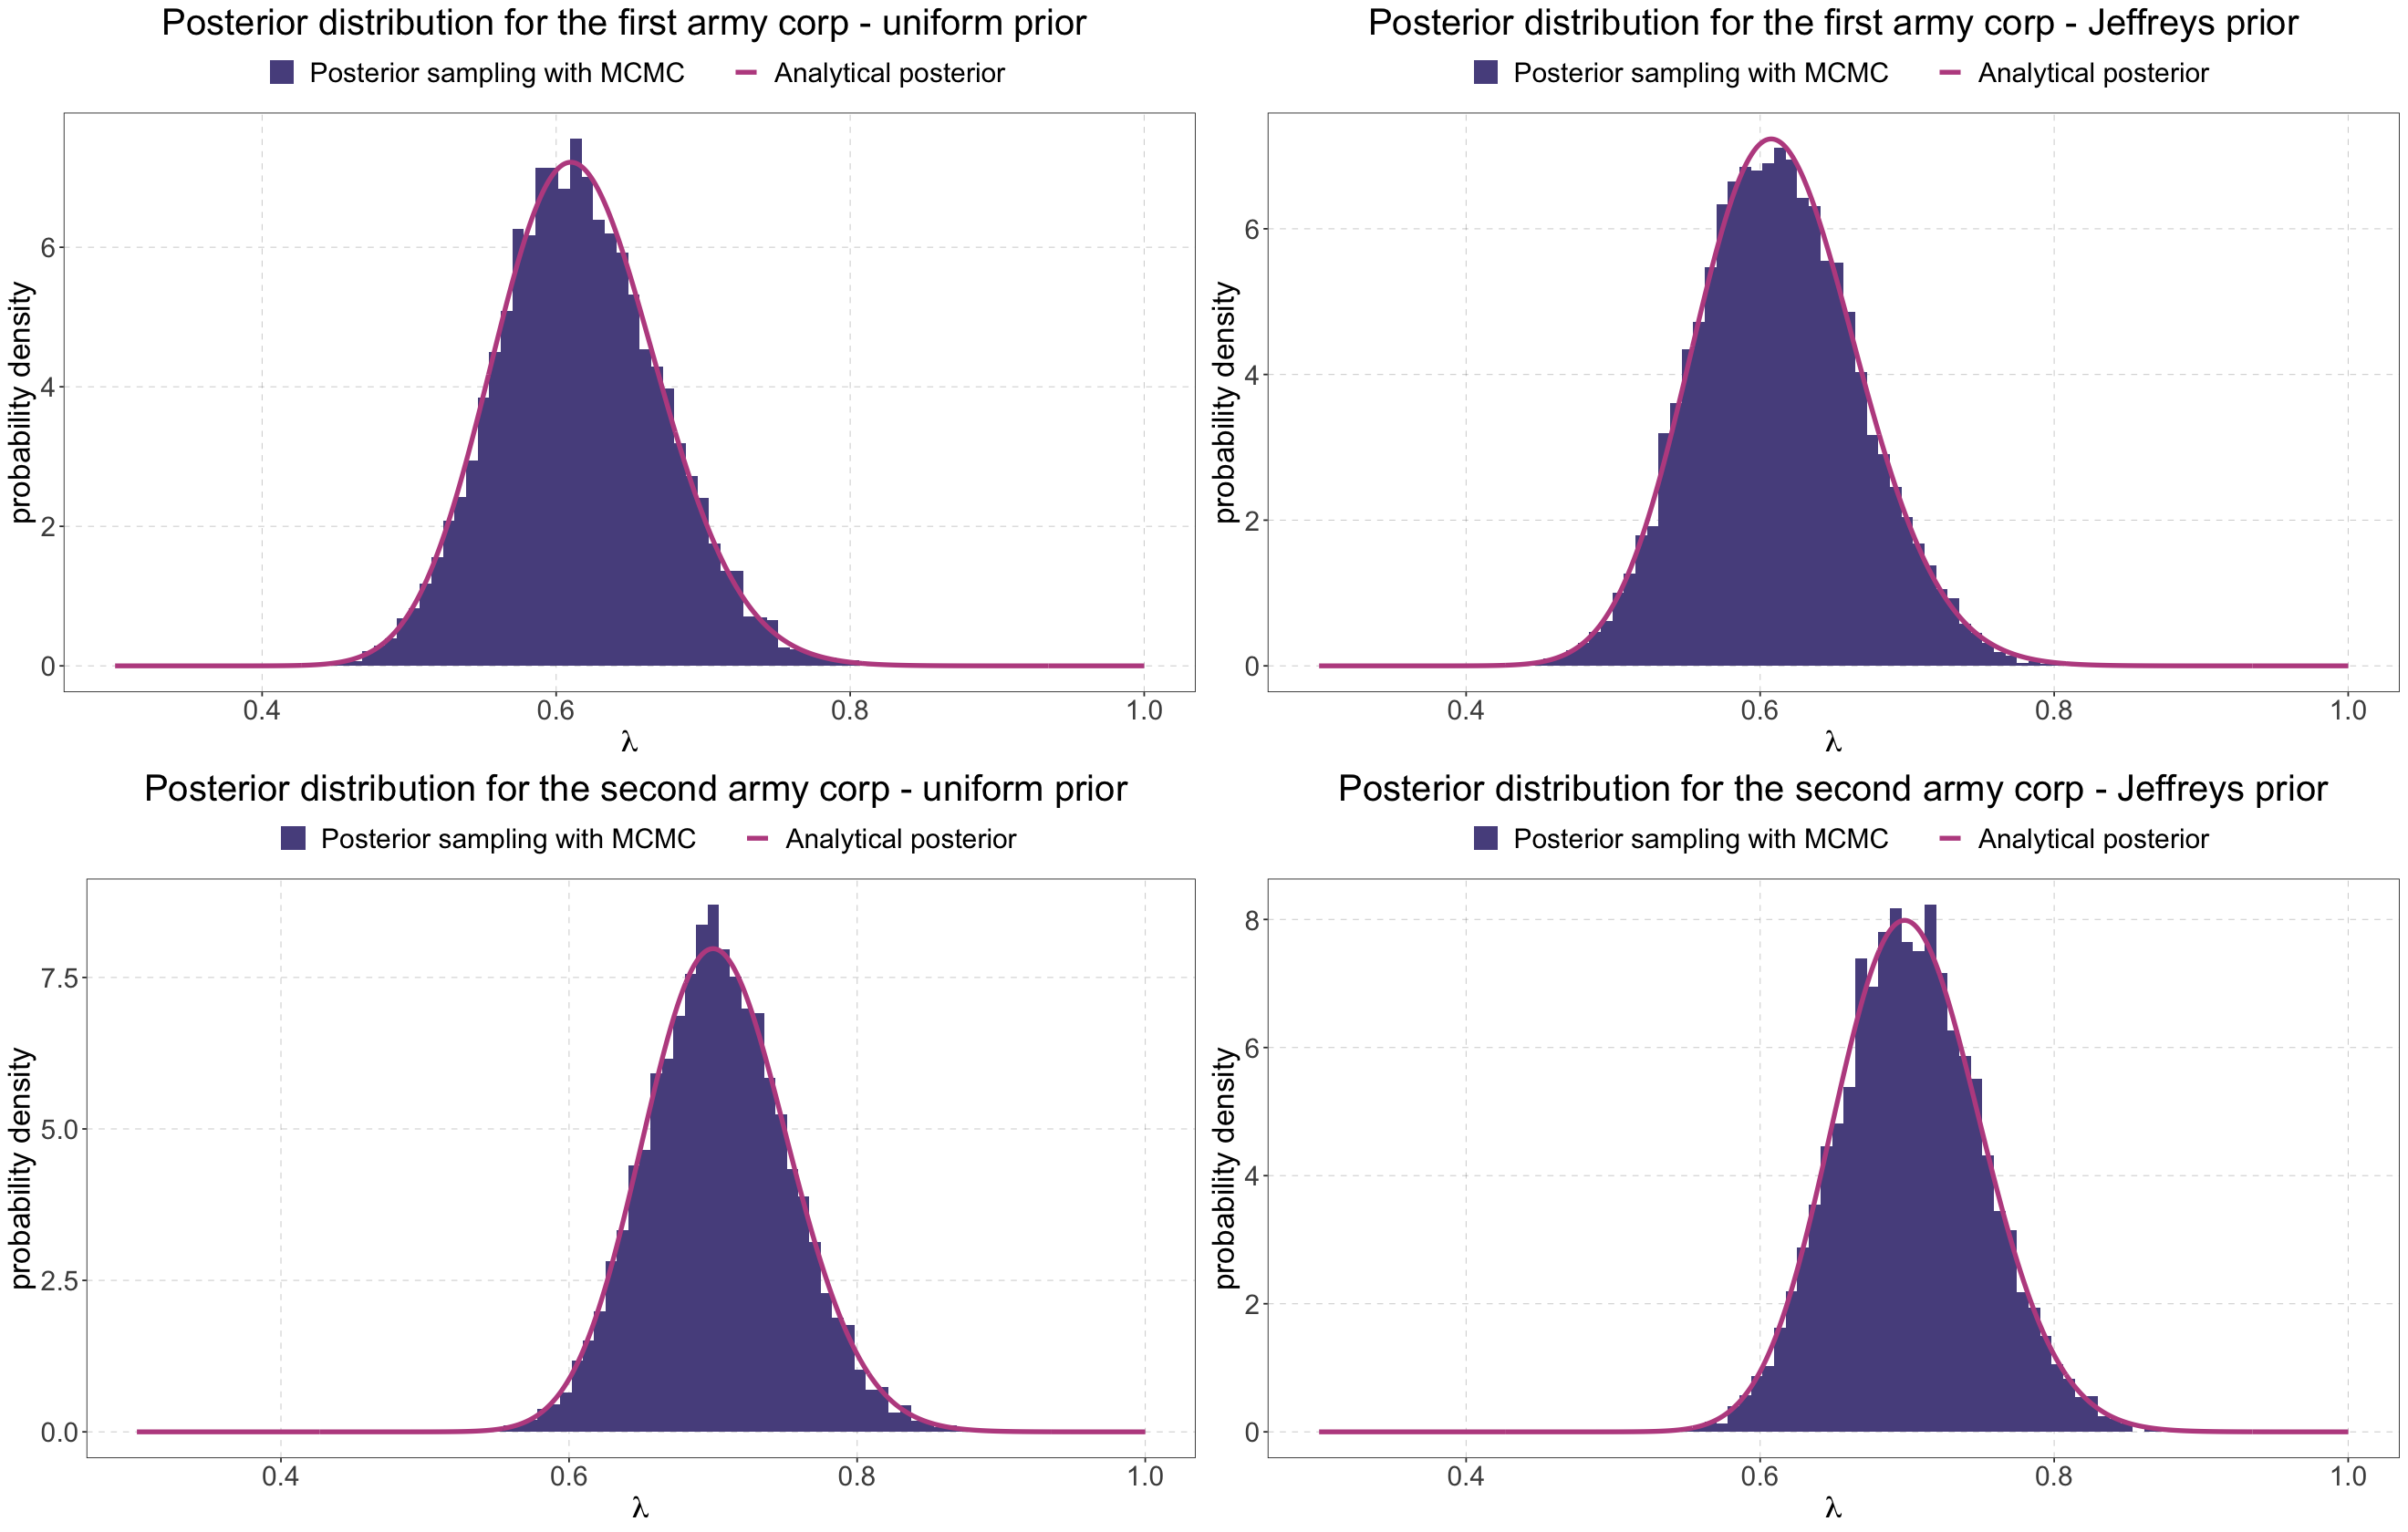

In [39]:
grid.arrange(plot_inf_lambda1_unif, plot_inf_lambda1_jef, plot_inf_lambda2_unif, plot_inf_lambda2_jef, nrow = 2, ncol = 2)

options(warn = defaultW)

We can observe that the sampling distributions agree with the previous analysis, as expected.

Finally, we summarize the results we obtained for the death rate $\lambda$:

| **first army corp** | **$$\text{prior}$$** | **$\text{mean}$** | **$\text{median}$** | **$\text{variance}$** | **$$95\%\,\text{CI}$$** | 
| --- | --- | --- | --- | --- | ---|
| $\text{Bayesian Analysis}$ | $\text{uniform}$ | $0.615$ | $0.613$ | $0.003$ | $0.511 \, - \, 0.728$
| $\text{Bayesian Analysis}$ | $\text{Jeffreys}$ | $0.613$ | $0.611$ | $0.003$ | $0.509\, - \,0.726$ |
| $\text{MCMC}$ | $\text{uniform}$ | $0.616$ | $0.614$ | $0.003$ | $0.511 \, - \, 0.729$ |
| $\text{MCMC}$ | $\text{Jeffreys}$ | $0.612$ | $0.610$ | $0.003$ | $0.509 \, - \, 0.725$ |

| **second army corp** | **$$\text{prior}$$** | **$\text{mean}$** | **$\text{median}$** | **$\text{variance}$** | **$$95\%\,\text{CI}$$** | 
| --- | --- | --- | --- | --- | ---|
| $\text{Bayesian Analysis}$ | $\text{uniform}$ | $0.704$ | $0.702$ | $0.003$ | $0.609 \, - \, 0.805$
| $\text{Bayesian Analysis}$ | $\text{Jeffreys}$ | $0.702$ | $0.703$ | $0.003$ | $0.607\, - \,0.803$ |
| $\text{MCMC}$ | $\text{uniform}$ | $0.704$ | $0.702$ | $0.002$ | $0.610 \, - \, 0.803$ |
| $\text{MCMC}$ | $\text{Jeffreys}$ | $0.702$ | $0.701$ | $0.003$ | $0.609 \, - \, 0.803$ |

--------------

# Exercise 3

#### **First measurement**

A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. $n = 116$ samples were taken from streams having a high environmental impact on pandas. Out of these, $y = 11$ had a high bacter X level.

Indicate with $p$ the probability that a sample of water taken from the stream has a high bacter X level.

#### 1. Find the frequentist estimator for $p$

The frequentist estimator is

$$ p = \frac{y}{n} $$

In [343]:
n_bacteria1 <- 116
y_bacteria1 <- 11

In [344]:
p_freq1 <- y_bacteria1/n_bacteria1
cat(glue("The frequentist estimator is p = {round(p_freq1, 3)} --> p = {round(p_freq1*100,1)}%"))

The frequentist estimator is p = 0.095 --> p = 9.5%

#### 2. Using a $\text{Beta}(1, 10)$ prior for $p$, calculate the posterior distribution for $p$

From Bayes' theorem, the posterior distribution for $p$, that is the probability that a sample of water taken from the stream has a high bacter X level, can be expressed as

$$ P(p|y, n, H) = \frac{P(y|p, n, H)P(p|H)}{P(y|n,H)} $$

where $n = 116$ are our samples, $y = 11$ our measurements and $H$ is the hypothesis that $H$ follows a binomial distribution.

The appropriate likelihood is a binomial distribution with $y$ successes in $n$ independent trials, and $p$ the probability of success, that in our case the success is to have a high bacter X level.

If we use a $\text{Beta}(1,10)$ as the prior distribution for $p$, the posterior distribution for $p$ is a $\text{Beta}$, since we have the conjugate prior for the likelihood, with parameters

$$ \alpha = \alpha_{prior} + y $$
$$ \beta = \beta_{prior} + n  -y $$

In [345]:
# values for p
p <- seq(0, 0.3, 10^(-3))

In [346]:
# beta posterior parameters
alpha_post1 <- 1 + y_bacteria1
beta_post1 <- 10 + n_bacteria1 - y_bacteria1

# beta posterior
post_beta1 <- dbeta(p, alpha_post1, beta_post1)

In [347]:
alpha_post1
beta_post1

[1] 12

[1] 115

#### 3. Find the bayesian estimator for $p$, the posterior mean and variance, and a $95\%$ CI

The expected value, mode and variance for a $\text{Gamma}$ distribution are

$$ E[X] = \frac{\alpha}{\alpha + \beta} $$

$$ \text{mode} = \frac{\alpha -1}{\alpha + \beta -2} $$

$$ \text{var}[X] = \frac{\alpha\beta}{ (\alpha + \beta)^2 (\alpha + \beta +1) } $$

In [348]:
# theoretical mean
mean_th_beta_1 <- alpha_post1/(alpha_post1 + beta_post1)

# theoretical variance
var_th_beta_1 <- alpha_post1*beta_post1/( (alpha_post1+beta_post1)^2 * (alpha_post1+beta_post1+1) )

# theoretical mode
mode_th_beta_1 <- (alpha_post1-1)/(alpha_post1+beta_post1-2)

cat(glue("The mean value, the mode and the variance of the posterior probability distribution, calculated from theory, are: "))
cat("\n")
cat(glue("\t - mean = {round(mean_th_beta_1,4)}"))
cat("\n")
cat(glue("\t - mode = {round(mode_th_beta_1,4)}"))
cat("\n")
cat(glue("\t - variance = {round(var_th_beta_1,4)}"))

The mean value, the mode and the variance of the posterior probability distribution, calculated from theory, are: 
	 - mean = 0.0945
	 - mode = 0.088
	 - variance = 7e-04

In [349]:
# mean from distribution
mean_beta1 <- integrate(function(x) dbeta(x, alpha_post1, beta_post1)*x, 0, 1)

# mode from distribution
idx <- which.max(post_beta1)
mode_beta1 <- p[idx]

# median from distribution
med_beta1 <- qbeta(0.5, alpha_post1, beta_post1)

# variance from distribution
var_beta1 <- integrate(function(x) dbeta(x, alpha_post1, beta_post1)*(x-mean_beta1$value)^2, 0,1)

cat("From distribution, we have calculated:")
cat("\n")
cat(glue("\t - mean = {round(mean_beta1$value,4)}"))
cat("\n")
cat(glue("\t - mode = {round(mode_beta1,4)}"))
cat("\n")
cat(glue("\t - median = {round(med_beta1,4)}"))
cat("\n")
cat(glue("\t - variance = {round(var_beta1$value,4)}"))

From distribution, we have calculated:
	 - mean = 0.0945
	 - mode = 0.088
	 - median = 0.0924
	 - variance = 7e-04

In [350]:
# 95% CI

p_min1 <- qbeta(lowLim, alpha_post1, beta_post1)
p_max1 <- qbeta(upLim, alpha_post1, beta_post1)

cat(glue("95% CI: {round(p_min1, 4)} - {round(p_max1, 4)}"))

95% CI: 0.0502 - 0.1508

In [351]:
# plot

plot_post_beta1 <- ggplot() + 
                    geom_area(
                    aes(
                        x = p[p > p_min1 & p < p_max1],
                        y = post_beta1[p > p_min1 & p < p_max1],
                        fill = "95% CI"
                    ),
                    alpha = 0.4
                    ) +
                    geom_line(
                        aes(
                            x = p, 
                            y = post_beta1,
                            color = "Posterior"
                            ),
                        linewidth = 1.5
                    ) + 
                    geom_line(
                        aes(
                            x = p,
                            y = dbeta(p, 1, 10),
                            color = "Beta(1,10) prior"
                        ),
                        linewidth = 1.5
                    ) +
                    geom_segment(
                        aes(
                            x = mean_beta1$value,
                            y = 0,
                            xend = mean_beta1$value,
                            yend = 16.5,
                            color = "Mean = 0.0945"
                        ),
                        linetype = "longdash",
                        linewidth = 1
                    ) + 
                    geom_segment(
                        aes( x = p_min1, y = 0, xend = p_min1, yend = 16.5),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( x = p_max1, y = 0, xend = p_max1, yend = 16.5),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    )

plot_post_beta1 <- plot_post_beta1 +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 24, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "p", 
              y = "probability density", 
              title = "Posterior distribution - Beta(1,10) prior " ) +
        scale_color_manual(name = "", 
                        values = c(
                            "Posterior" = color_palette[1], 
                            "Beta(1,10) prior" = color_palette[2], 
                            "Mean = 0.0945" = color_palette[3]
                            )
                        ) + 
        scale_fill_manual( name = "",
                           values = c("95% CI" = color_palette[4])) +
        scale_x_continuous(n.breaks = 6) +
        scale_y_continuous(n.breaks = 6)

In [352]:
# adjusting plot settings

std_width  <- 12
std_height <- 8
options(repr.plot.width = std_width, repr.plot.height = std_height)

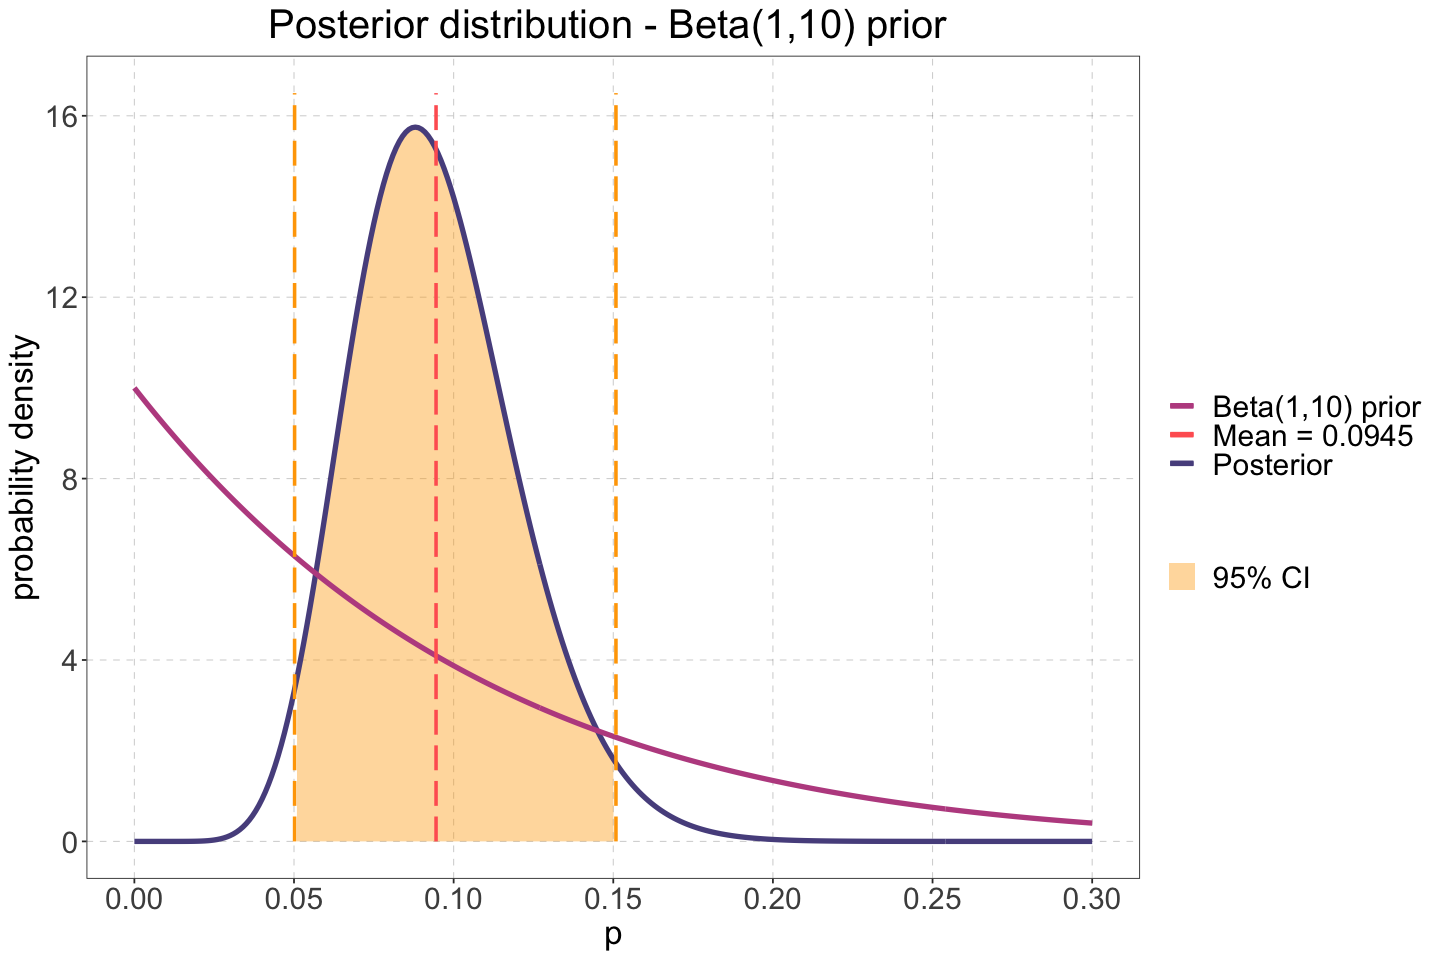

In [353]:
plot_post_beta1

Our bayesian estimator for $p$ can be the mean of the posterior distribution, but also the median (if do not want to take into account the influence of the tails on the mean) or the mode (if we just want the most probable parameter).

#### 4. Test the hypothesis $H_0$ versus $H_1$ at $5\%$ level of significance with both the frequentist and bayesian approach

$$ H_0: \,\, p = 0.1 $$
$$ H_1: \,\, p \not= 0.1 $$

We define $p_0 = 0.1$

We have a two - sides Hypothesis Test: we want to detect any changes from the value $p_0$.

In the **frequentist approach** we have that the null distribution of the test statistic is the sampling distribution of the test statistic, given that the null hypothesis $H_0$ is true:

$$ \text{Binom}(y, n, p = p_0) $$

where $y$ are the observations and $n$ the total number of measurement.

Our level of significance is $\alpha = 5\%$, but since $y$ has a discrete distribution, only discrete values of $\alpha$ are possible. Then, the rejection region must be chosen accordingly.

In [354]:
# probability threshold of hypothesis testing
p0 <- 0.1

In [355]:
# observations
obs <- seq(0, 25, 1)

# null distribution of test statistic
test_distr <- dbinom(obs, n_bacteria1, p0)

In [356]:
# plot

plot_freq1 <- ggplot() +
                geom_col(
                    aes(
                        x = obs,
                        y = test_distr
                    ),
                    fill = color_palette[2]
                )

plot_freq1 <- plot_freq1 + 
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 28, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "y", 
              y = "probability density", 
              title = "Frequentist HT - null distribution of test statistic" ) +
        scale_x_continuous(n.breaks = 6) +
        scale_y_continuous(n.breaks = 6)

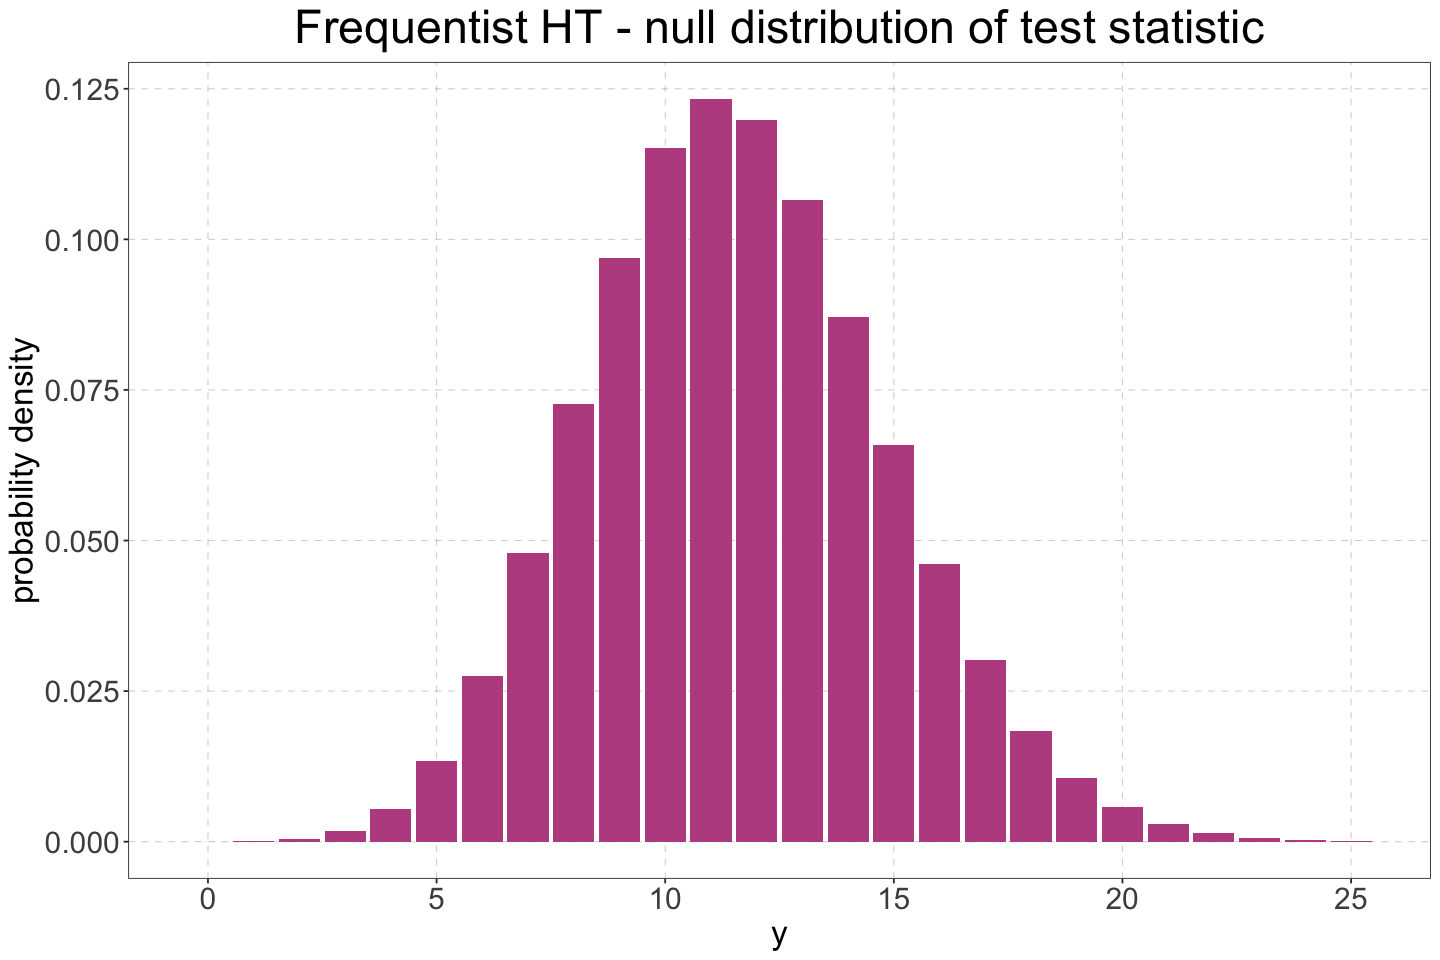

In [357]:
plot_freq1

In [358]:
# CDF plot

cdf <- pbinom(obs, n_bacteria1, p0)

plot_freq2 <- ggplot() + 
                geom_rect(
                    aes(
                        xmin = 0,
                        xmax = 25.5,
                        ymin = 0.025,
                        ymax = 0.975,
                        fill = "Acceptance region"
                    ),
                    alpha = 0.5
                ) + 
                geom_rect(
                    aes(
                        xmin = 0,
                        xmax = 25.5,
                        ymin = 0,
                        ymax = 0.025,
                        fill = "Rejection region"
                    ),
                    alpha = 0.5
                ) + 
                geom_rect(
                    aes(
                        xmin = 0,
                        xmax = 25.5,
                        ymin = 0.975,
                        ymax = 1,
                        fill = "Rejection region"
                    ),
                    alpha = 0.5
                ) +
                geom_col(
                    aes(
                        x = obs,
                        y = cdf,
                        fill = "CDF"
                    )
                ) +
                geom_col(
                    aes(
                        x = y_bacteria1,
                        y = pbinom(y_bacteria1, n_bacteria1, p0),
                        fill = "y = 11"
                    )
                ) 

plot_freq2 <- plot_freq2 + 
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        scale_fill_manual(
            name = "",
            values = c(
                "CDF" = color_palette[1],
                "y = 11" = color_palette[2],
                "Acceptance region" = color_palette[4],
                "Rejection region" = color_palette[3]
            )
        ) +
        labs( x = "y", 
              y = "F(y)",
              title = "Frequentist HT - acceptance and rejection regions for null hypothesis" ) +
        scale_x_continuous(n.breaks = 6) +
        scale_y_continuous(n.breaks = 6)

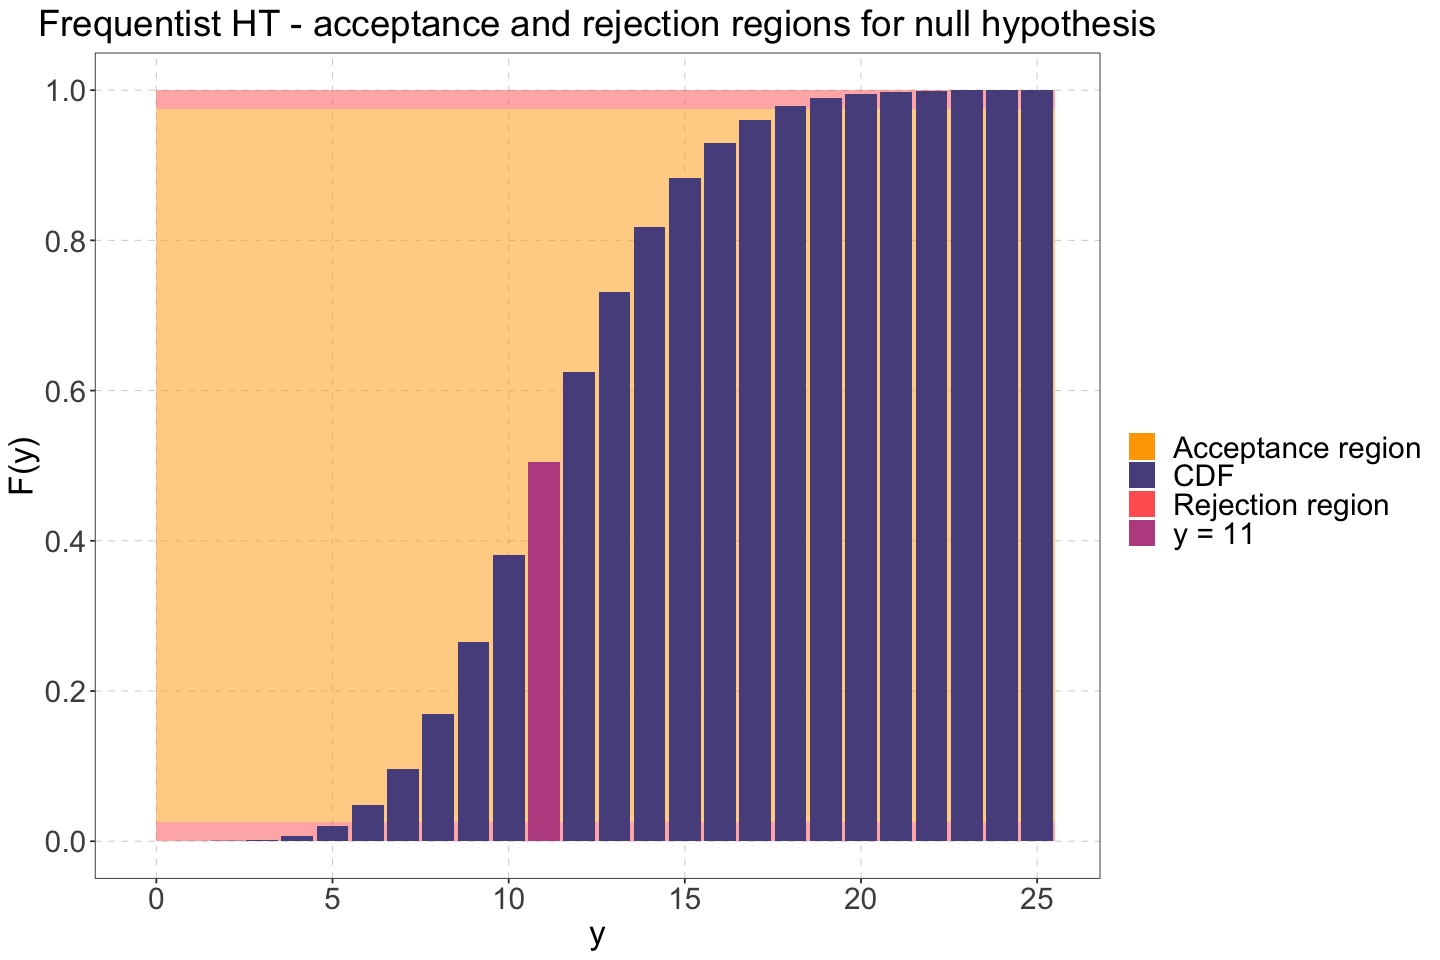

In [359]:
plot_freq2

We can identify the rejection region, taking into account that $y$ has a discrete distribution and chosing the level of significance as close to $\alpha$ as possible. For the frequentist approach, $y=11$, our observations, lies in the acceptance region, so we cannot reject $H_0$.

In the **Bayesian approach** we have to compute the $(1-\alpha)\%$ CI for $p$. Then, if $p_0$ lies inside this interval, we do not reject $H_0$, otherwise we reject the null hypothesis.

The CI we have to compute is of $95\%$ since $\alpha = 5\%$: we already have done that in the previous point. $p_0$ is inside the interval, so we cannot reject $H_0$.

#### **Second measurement**

A new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high batter X level.

#### 1. Find the frequentist estimator for $p$

The frequentist estimator is

$$ p = \frac{y}{n} $$

In [360]:
n_bacteria2 <- 165
y_bacteria2 <- 9

In [361]:
p_freq2 <- y_bacteria2/n_bacteria2
cat(glue("The frequentist estimator is p = {round(p_freq2, 3)} --> p = {round(p_freq2*100,1)}%"))

The frequentist estimator is p = 0.055 --> p = 5.5%

#### 2. Find a bayesian estimator for $p$, assuming both a $Beta(1,10)$ and the posterior from the previous measurement as the prior.

In [362]:
# values for p

p1 <- seq(0, 0.2, 0.0001)

In [363]:
# CASE OF BETA(1,10) PRIOR

# beta posterior parameters
alpha_post2 <- 1 + y_bacteria2
beta_post2 <- 10 + n_bacteria2 - y_bacteria2

# beta posterior
post_beta2 <- dbeta(p1, alpha_post2, beta_post2)

In [364]:
# theoretical mean
mean_th_beta_2 <- alpha_post2/(alpha_post2 + beta_post2)

# theoretical variance
var_th_beta_2 <- alpha_post2*beta_post2/( (alpha_post2+beta_post2)^2 * (alpha_post2+beta_post2+1) )

# theoretical mode
mode_th_beta_2 <- (alpha_post2-1)/(alpha_post2+beta_post2-2)

cat(glue("The mean value, the mode and the variance of the posterior probability distribution, calculated from theory, are: "))
cat("\n")
cat(glue("\t - mean = {round(mean_th_beta_2,4)}"))
cat("\n")
cat(glue("\t - mode = {round(mode_th_beta_2,4)}"))
cat("\n")
cat(glue("\t - variance = {round(var_th_beta_2,4)}"))

The mean value, the mode and the variance of the posterior probability distribution, calculated from theory, are: 
	 - mean = 0.0568
	 - mode = 0.0517
	 - variance = 3e-04

In [365]:
# mean from distribution
mean_beta2 <- integrate(function(x) dbeta(x, alpha_post2, beta_post2)*x, 0, 1)

# mode from distribution
idx2 <- which.max(post_beta2)
mode_beta2 <- p1[idx2]

# median from distribution
med_beta2 <- qbeta(0.5, alpha_post2, beta_post2)

# variance from distribution
var_beta2 <- integrate(function(x) dbeta(x, alpha_post2, beta_post2)*(x-mean_beta2$value)^2, 0,1)

cat("From distribution, we have calculated:")
cat("\n")
cat(glue("\t - mean = {round(mean_beta2$value,4)}"))
cat("\n")
cat(glue("\t - mode = {round(mode_beta2,4)}"))
cat("\n")
cat(glue("\t - median = {round(med_beta2,4)}"))
cat("\n")
cat(glue("\t - variance = {round(var_beta2$value,4)}"))

From distribution, we have calculated:
	 - mean = 0.0568
	 - mode = 0.0517
	 - median = 0.0551
	 - variance = 3e-04

In [366]:
# 95% CI

p_min2 <- qbeta(lowLim, alpha_post2, beta_post2)
p_max2 <- qbeta(upLim, alpha_post2, beta_post2)

In [367]:
# plot

plot_post_beta2 <- ggplot() + 
                    geom_area(
                    aes(
                        x = p1[p1 > p_min2 & p1 < p_max2],
                        y = post_beta2[p1 > p_min2 & p1 < p_max2],
                        fill = "95% CI"
                    ),
                    alpha = 0.4
                    ) +
                    geom_line(
                        aes(
                            x = p1, 
                            y = post_beta2,
                            color = "Posterior"
                            ),
                        linewidth = 1.5
                    ) + 
                    geom_line(
                        aes(
                            x = p1,
                            y = dbeta(p1, 1, 10),
                            color = "Beta(1,10) prior"
                        ),
                        linewidth = 1.5
                    ) +
                    geom_segment(
                        aes(
                            x = mean_beta2$value,
                            y = 0,
                            xend = mean_beta2$value,
                            yend = 25,
                            color = "Mean = 0.0568"
                        ),
                        linetype = "longdash",
                        linewidth = 1
                    ) + 
                    geom_segment(
                        aes( x = p_min2, y = 0, xend = p_min2, yend = 25),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( x = p_max2, y = 0, xend = p_max2, yend = 25),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    )

plot_post_beta2 <- plot_post_beta2 +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 28, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "p", 
              y = "probability density", 
              title = "Posterior distribution - Beta(1,10) prior " ) +
        scale_color_manual(name = "", 
                        values = c(
                            "Posterior" = color_palette[1], 
                            "Beta(1,10) prior" = color_palette[2], 
                            "Mean = 0.0568" = color_palette[3]
                            )
                        ) + 
        scale_fill_manual( name = "",
                           values = c("95% CI" = color_palette[4])) +
        scale_x_continuous(n.breaks = 6) +
        scale_y_continuous(n.breaks = 6)

In [368]:
# CASE OF BETA POSTERIOR FROM THE FIRST MEASUREMENT AS PRIOR

# beta posterior parameters
alpha_post3 <- alpha_post1 + y_bacteria2
beta_post3 <- beta_post1 + n_bacteria2 - y_bacteria2

# beta posterior
post_beta3 <- dbeta(p1, alpha_post3, beta_post3)

In [369]:
# theoretical mean
mean_th_beta_3 <- alpha_post3/(alpha_post3 + beta_post3)

# theoretical variance
var_th_beta_3 <- alpha_post3*beta_post3/( (alpha_post3+beta_post3)^2 * (alpha_post3+beta_post3+1) )

# theoretical mode
mode_th_beta_3 <- (alpha_post3-1)/(alpha_post3+beta_post3-2)

cat(glue("The mean value, the mode and the variance of the posterior probability distribution, calculated from theory, are: "))
cat("\n")
cat(glue("\t - mean = {round(mean_th_beta_3,4)}"))
cat("\n")
cat(glue("\t - mode = {round(mode_th_beta_3,4)}"))
cat("\n")
cat(glue("\t - variance = {round(var_th_beta_3,4)}"))

The mean value, the mode and the variance of the posterior probability distribution, calculated from theory, are: 
	 - mean = 0.0719
	 - mode = 0.069
	 - variance = 2e-04

In [370]:
# mean from distribution
mean_beta3 <- integrate(function(x) dbeta(x, alpha_post3, beta_post3)*x, 0, 1)

# mode from distribution
idx3 <- which.max(post_beta3)
mode_beta3 <- p1[idx3]

# median from distribution
med_beta3 <- qbeta(0.5, alpha_post3, beta_post3)

# variance from distribution
var_beta3 <- integrate(function(x) dbeta(x, alpha_post3, beta_post3)*(x-mean_beta3$value)^2, 0,1)

cat("From distribution, we have calculated:")
cat("\n")
cat(glue("\t - mean = {round(mean_beta3$value,4)}"))
cat("\n")
cat(glue("\t - mode = {round(mode_beta3,4)}"))
cat("\n")
cat(glue("\t - median = {round(med_beta3,4)}"))
cat("\n")
cat(glue("\t - variance = {round(var_beta3$value,4)}"))

From distribution, we have calculated:
	 - mean = 0.0719
	 - mode = 0.069
	 - median = 0.0709
	 - variance = 2e-04

In [371]:
# 95% CI

p_min3 <- qbeta(lowLim, alpha_post3, beta_post3)
p_max3 <- qbeta(upLim, alpha_post3, beta_post3)

In [372]:
# plot

plot_post_beta3 <- ggplot() + 
                    geom_area(
                    aes(
                        x = p1[p1 > p_min3 & p1 < p_max3],
                        y = post_beta3[p1 > p_min3 & p1 < p_max3],
                        fill = "95% CI"
                    ),
                    alpha = 0.4
                    ) +
                    geom_line(
                        aes(
                            x = p1, 
                            y = post_beta3,
                            color = "Posterior"
                            ),
                        linewidth = 1.5
                    ) + 
                    geom_line(
                        aes(
                            x = p1,
                            y = dbeta(p1, 12, 115),
                            color = "Beta(12,115) prior"
                        ),
                        linewidth = 1.5
                    ) +
                    geom_segment(
                        aes(
                            x = mean_beta3$value,
                            y = 0,
                            xend = mean_beta3$value,
                            yend = 30,
                            color = "Mean = 0.0719"
                        ),
                        linetype = "longdash",
                        linewidth = 1
                    ) + 
                    geom_segment(
                        aes( x = p_min3, y = 0, xend = p_min3, yend = 30),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    ) +
                    geom_segment(
                        aes( x = p_max3, y = 0, xend = p_max3, yend = 30),
                        color = color_palette[4],
                        linetype = "longdash",
                        linewidth = 1
                    )

plot_post_beta3 <- plot_post_beta3 +
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 28, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "p", 
              y = "probability density", 
              title = "Posterior distribution - Beta(12,115) prior " ) +
        scale_color_manual(name = "", 
                        values = c(
                            "Posterior" = color_palette[1], 
                            "Beta(12,115) prior" = color_palette[2], 
                            "Mean = 0.0719" = color_palette[3]
                            )
                        ) + 
        scale_fill_manual( name = "",
                           values = c("95% CI" = color_palette[4])) +
        scale_x_continuous(n.breaks = 6) +
        scale_y_continuous(n.breaks = 6)

In [396]:
# adjusting plot settings

std_width  <- 14
std_height <- 12
options(repr.plot.width = std_width, repr.plot.height = std_height)

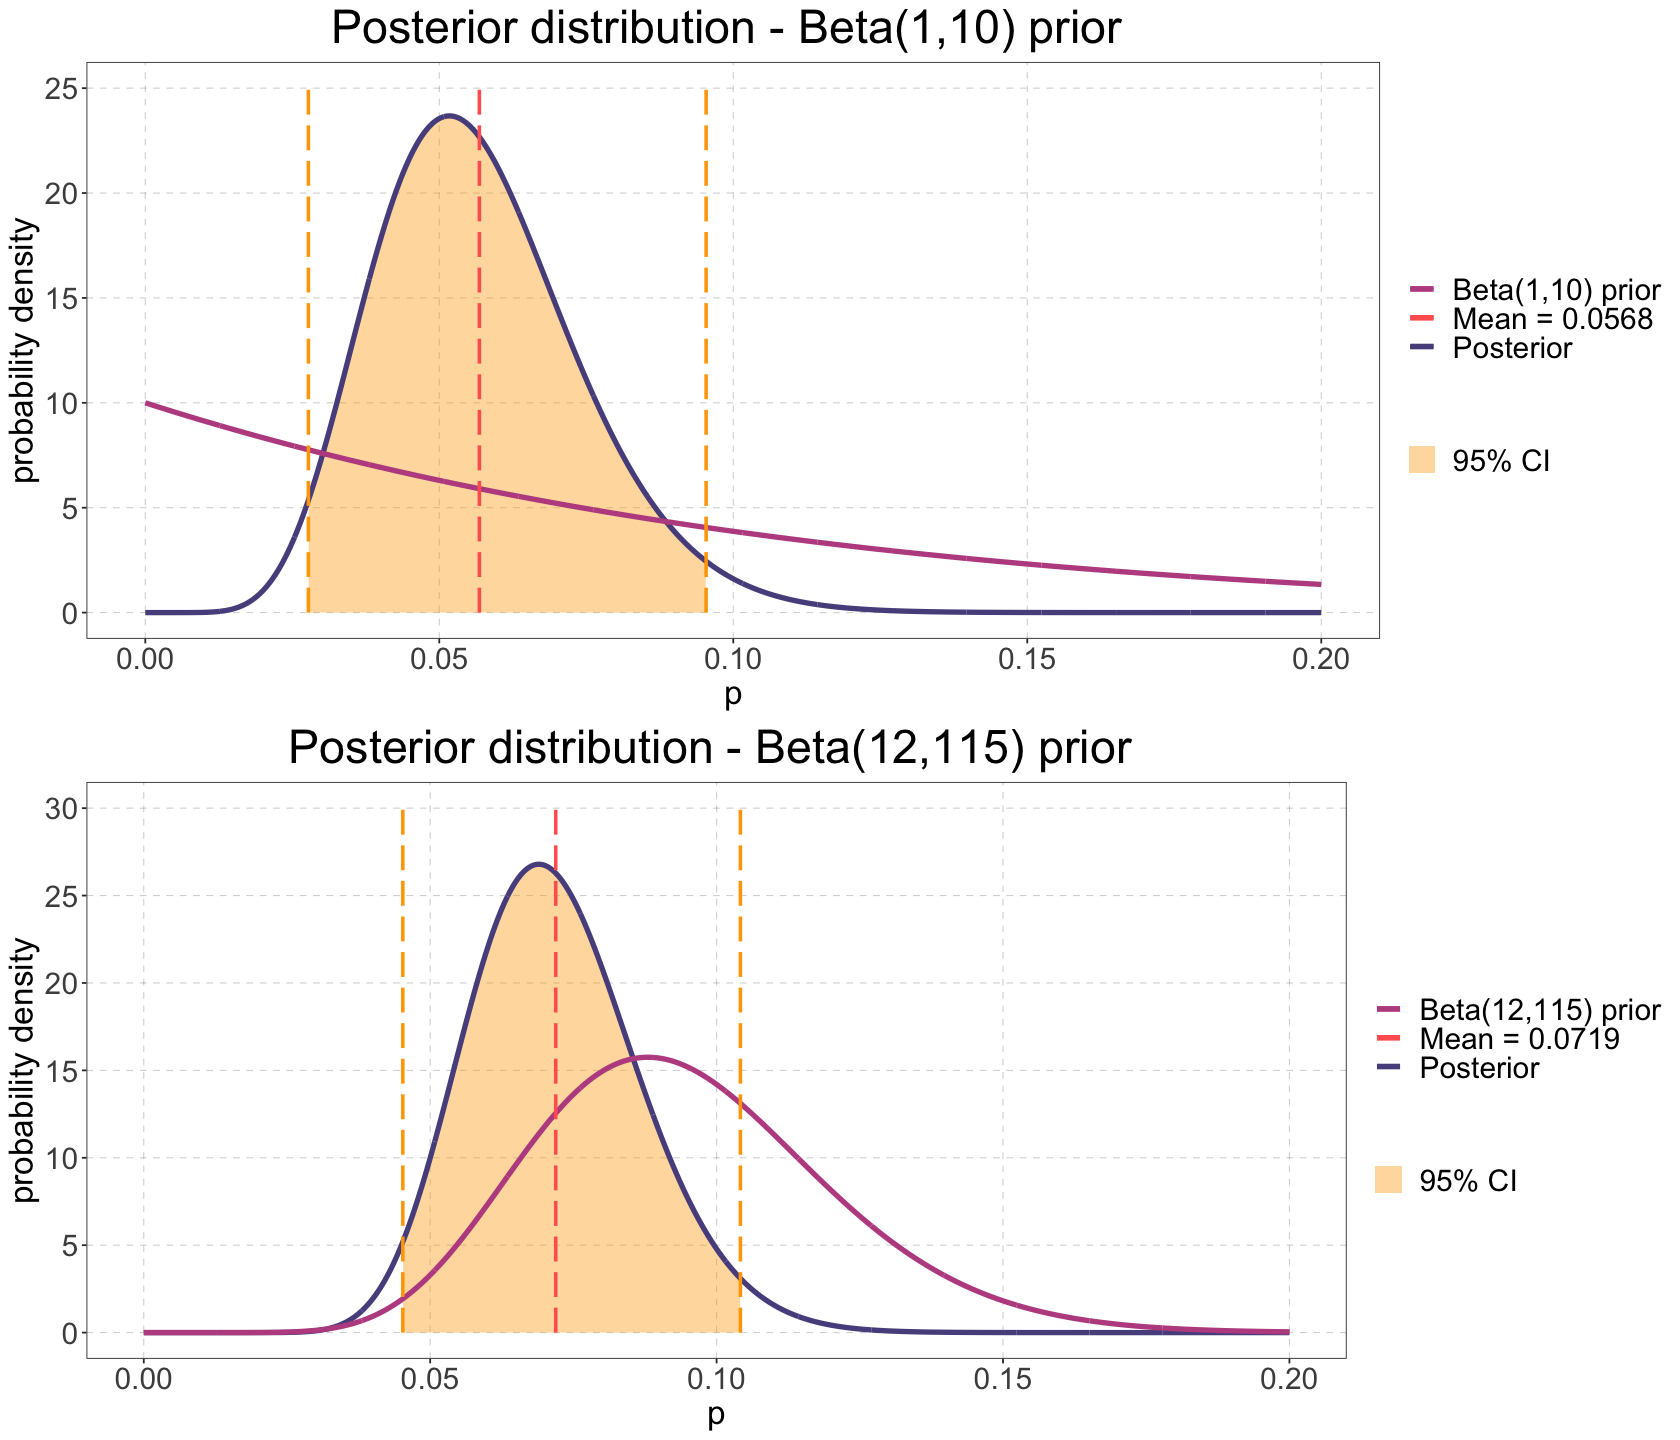

In [397]:
grid.arrange(plot_post_beta2, plot_post_beta3, ncol = 1, nrow = 2)

Our bayesian estimator for p having two set of measurements can be the mean of the posterior distribution in the case of Beta(12,115) prior.

#### 3. Calculate the posterior mean and variance and a $95\%$ CI

Done in the previous point.

#### 4. Test the hypothesis $H_0$ versus $H_1$ at $5\%$ level of significance with both the frequentist and the bayesian approach

$$ H_0: \,\, p = 0.1 $$
$$ H_1: \,\, p \not= 0.1 $$

We repeat what we have done for the first measurement.

In [375]:
# FREQUESTIST APPROACH

# numm distribution of test statistic
test_distr2 <- dbinom(obs, n_bacteria2, p0)

In [376]:
# plot

plot_freq3 <- ggplot() +
                geom_col(
                    aes(
                        x = obs,
                        y = test_distr2
                    ),
                    fill = color_palette[2]
                )

plot_freq3 <- plot_freq3 + 
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 28, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        labs( x = "y", 
              y = "probability density", 
              title = "Frequentist HT - null distribution of test statistic" ) +
        scale_x_continuous(n.breaks = 6) +
        scale_y_continuous(n.breaks = 6)

In [398]:
# adjusting plot settings

std_width  <- 12
std_height <- 8
options(repr.plot.width = std_width, repr.plot.height = std_height)

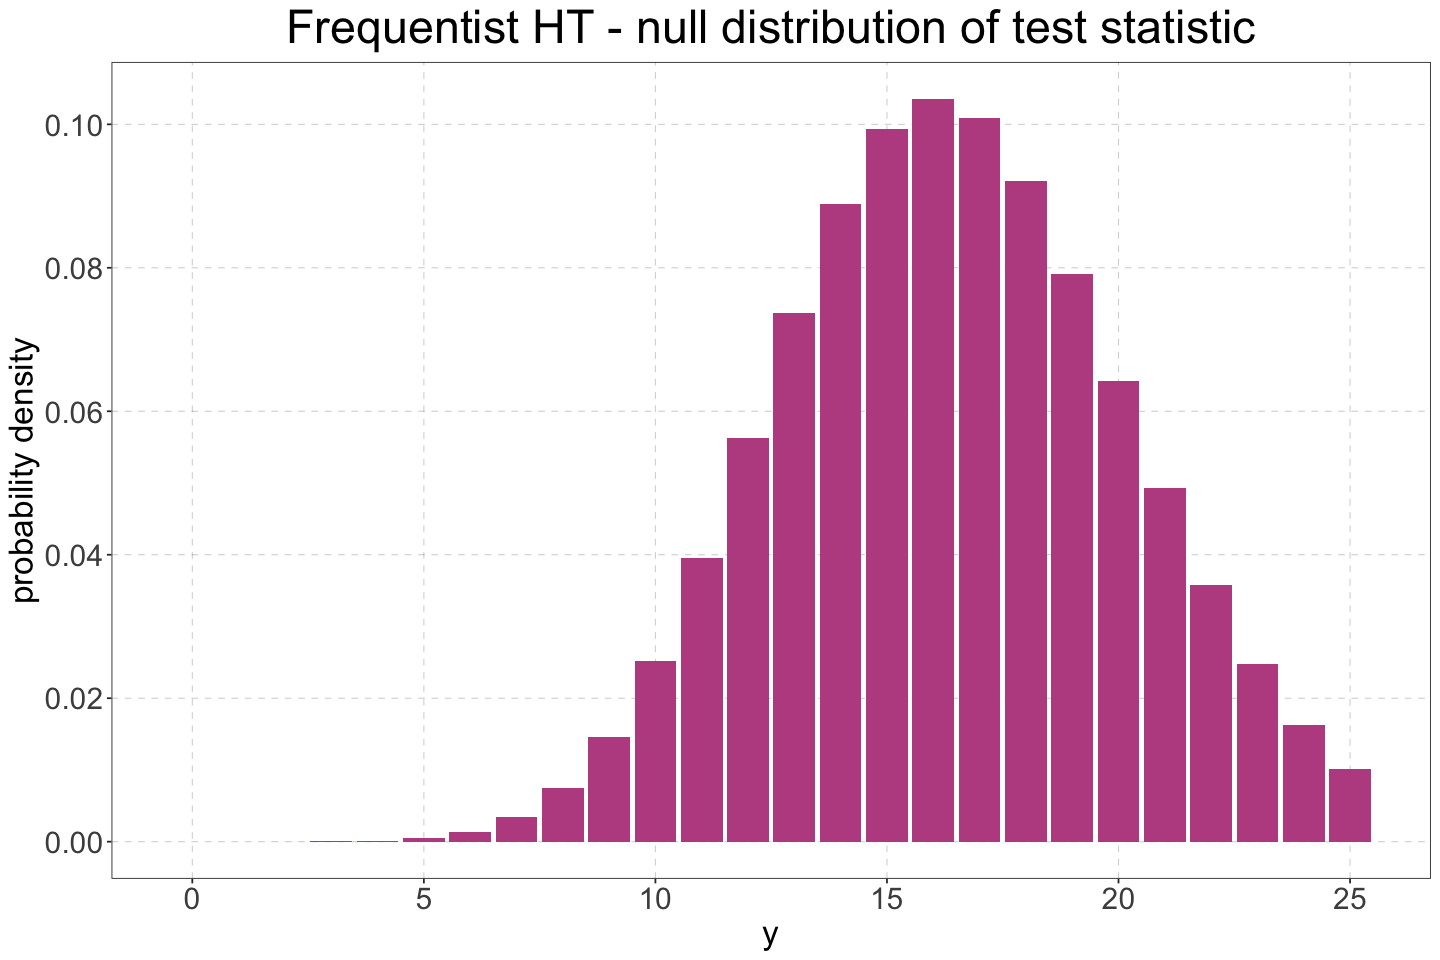

In [399]:
plot_freq3

In [378]:
# CDF plot

cdf2 <- pbinom(obs, n_bacteria2, p0)

plot_freq4 <- ggplot() +
                geom_rect(
                    aes(
                        xmin = 0,
                        xmax = 25.5,
                        ymin = 0.025,
                        ymax = 0.975,
                        fill = "Acceptance region"
                    ),
                    alpha = 0.5
                ) + 
                geom_rect(
                    aes(
                        xmin = 0,
                        xmax = 25.5,
                        ymin = 0,
                        ymax = 0.025,
                        fill = "Rejection region"
                    ),
                    alpha = 0.5
                ) + 
                geom_rect(
                    aes(
                        xmin = 0,
                        xmax = 25.5,
                        ymin = 0.975,
                        ymax = 1,
                        fill = "Rejection region"
                    ),
                    alpha = 0.5
                ) +
                geom_col(
                    aes(
                        x = obs,
                        y = cdf2,
                        fill = "CDF"
                    )
                ) +
                geom_col(
                    aes(
                        x = y_bacteria2,
                        y = pbinom(y_bacteria2, n_bacteria2, p0),
                        fill = "y = 9"
                    )
                ) 

plot_freq4 <- plot_freq4 + 
        theme_bw() +
        theme( legend.position = "right",
        plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "white" ) ) +
        scale_fill_manual(
            name = "",
            values = c(
                "CDF" = color_palette[1],
                "y = 9" = color_palette[2],
                "Acceptance region" = color_palette[4],
                "Rejection region" = color_palette[3]
            )
        ) +
        labs( x = "y", 
              y = "F(y)",
              title = "Frequentist HT - acceptance and rejection regions for null hypothesis" ) +
        scale_x_continuous(n.breaks = 6) +
        scale_y_continuous(n.breaks = 6)

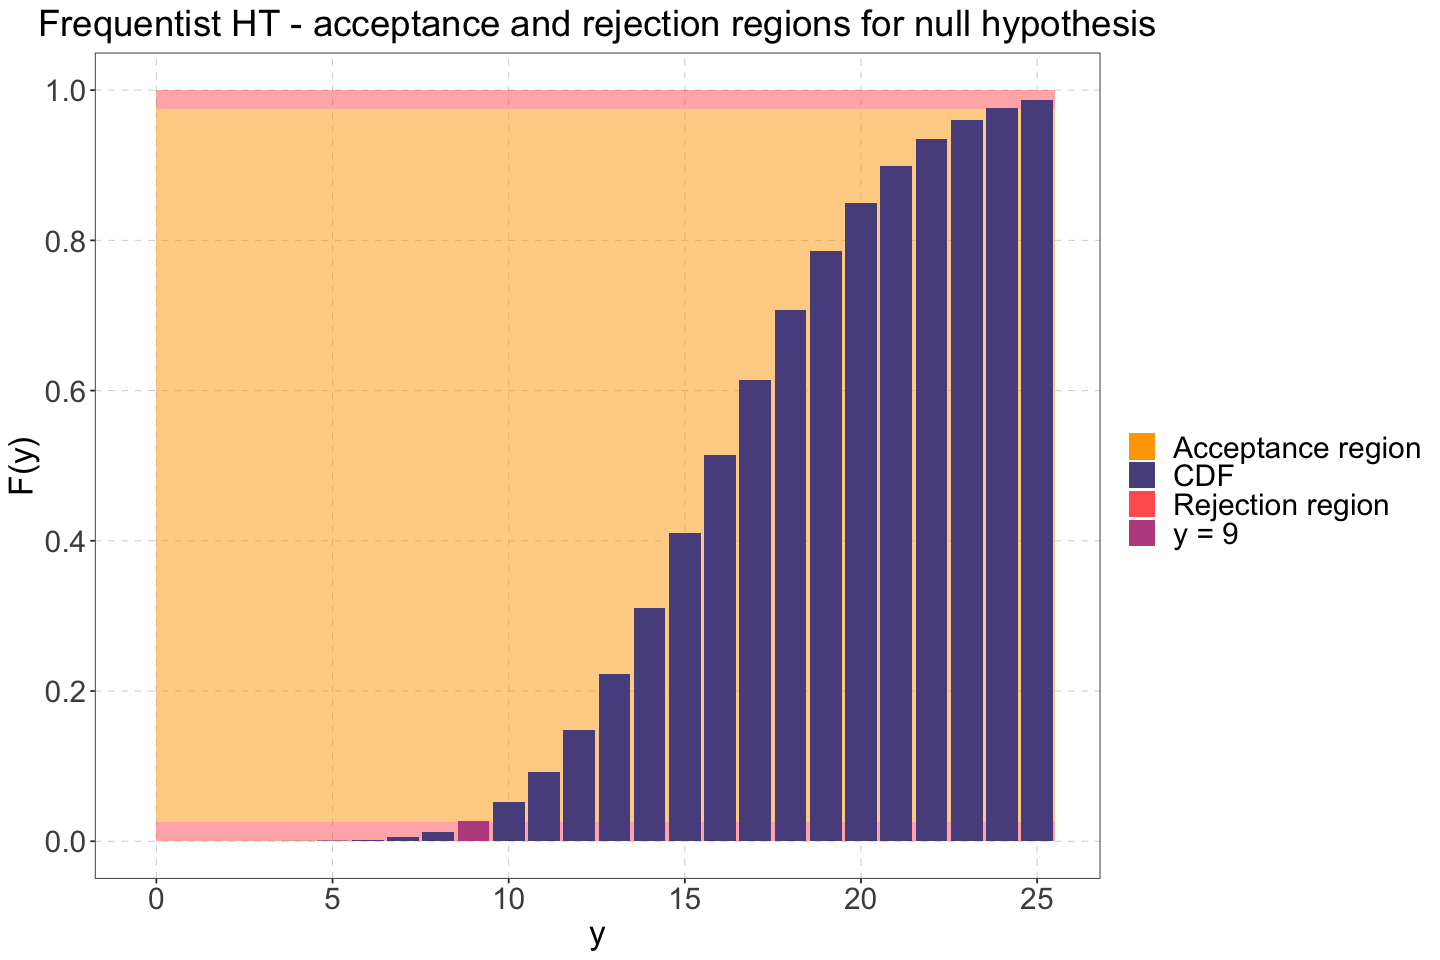

In [400]:
plot_freq4

Our observation lies in the acceptance region, so we cannot reject $H_0$.

In the **Bayesian approach** we have to compute the $95\%\, \text{CI}$: we already have done that in the previous point. 
In the case of $\text{Beta}(1,10)$ prior, $p_0$ does not lie inside the $95\%\,\text{CI}$, so we reject $H_0$.
In the case of $\text{Beta}(12,115)$ prior (the posterior computed from the first dataset), $p_0$ is inside the interval, so we cannot reject $H_0$.

------------

# Exercise 4

#### Analyze the data of Exercise 3 and solve points 2 and 3 for the first measurement using a MCMC with JAGS

In [380]:
# data for the model

data2 <- NULL
data2$X <- c(rep(1, y_bacteria1), rep(0, n_bacteria1-y_bacteria1))

In [381]:
# creating jags model
jm_beta <- jags.model("ex3.bug", data2)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 116
   Unobserved stochastic nodes: 1
   Total graph size: 119

Initializing model



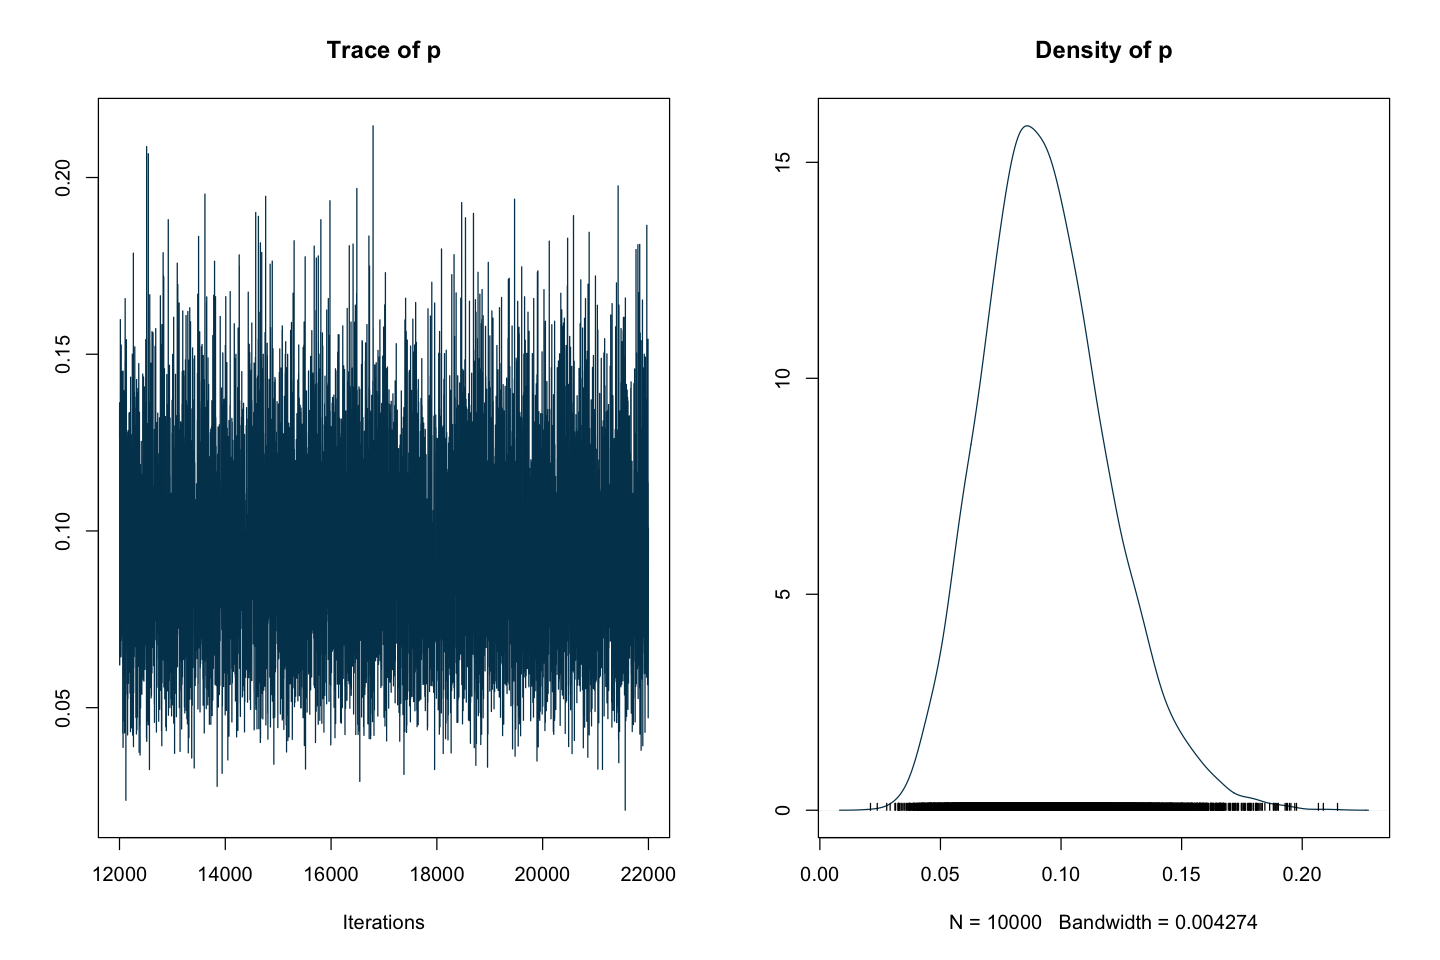

In [401]:
# update MCMC
update(jm_beta, 1000)

chain_beta <- coda.samples(jm_beta, "p", n.iter = 10000)
# results
plot(chain_beta, col = color_palette[5])

In [383]:
summary(chain_beta)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     0.0941738      0.0259186      0.0002592      0.0002592 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05058 0.07560 0.09192 0.11008 0.15089 


In [384]:
variance <- 0.0260227^2
variance

[1] 0.0006771809

In [385]:
# chain as dataframe
chain_beta_df <- as.data.frame(as.mcmc(chain_beta))

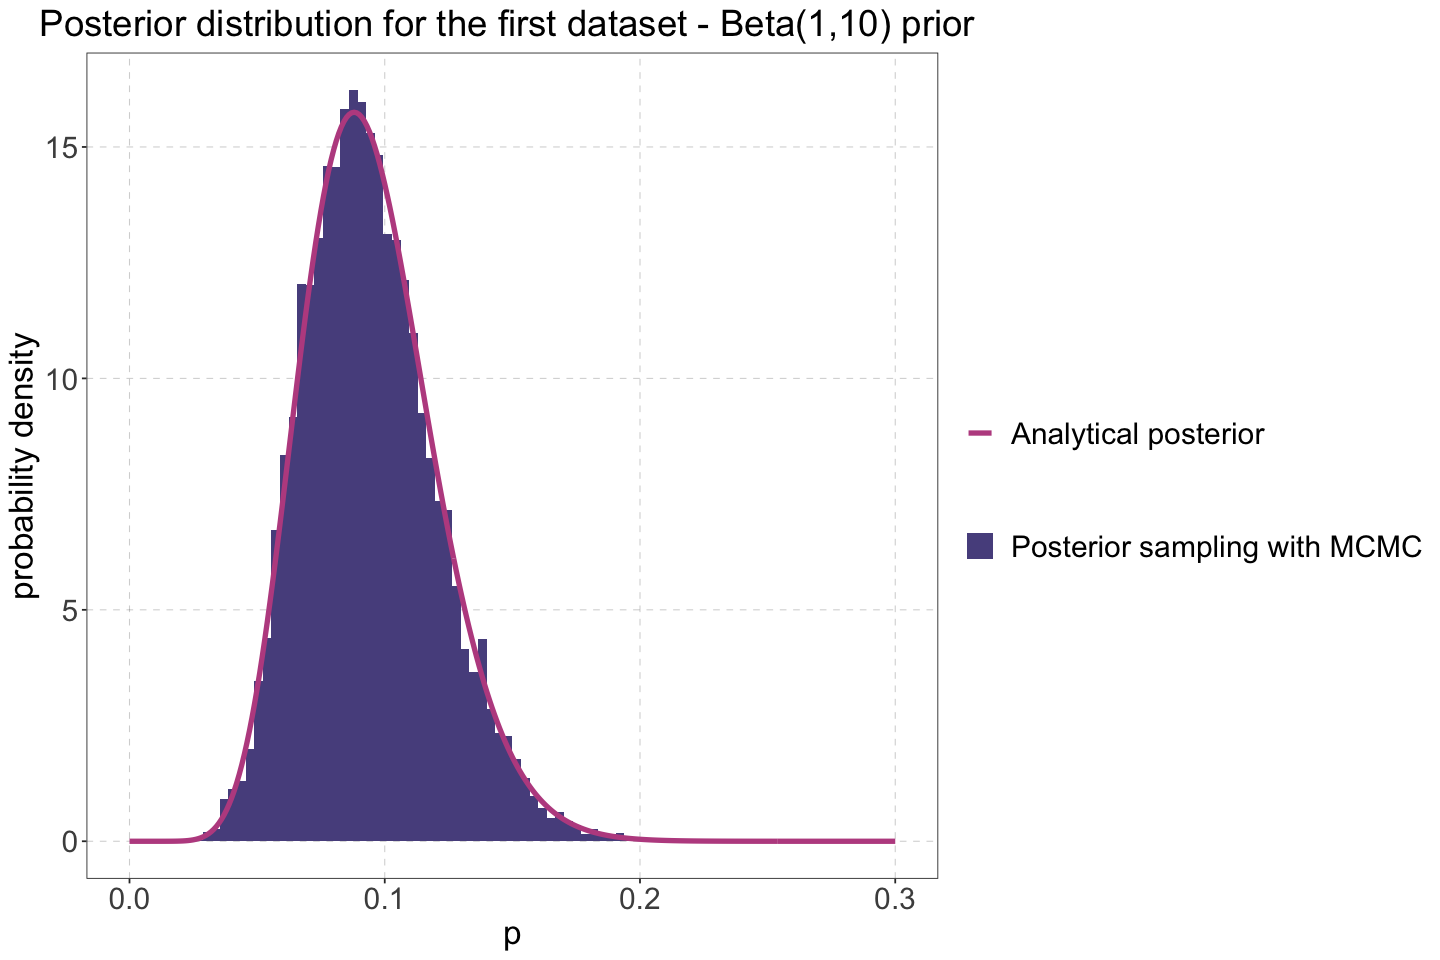

In [403]:
# inference on p plot
# with comparison with the previous analysis

plot_inf_p <- ggplot() + 
                geom_histogram(
                    aes(
                        x = chain_beta_df$p,
                        y = after_stat(density),
                        fill = "Posterior sampling with MCMC"
                    ),
                bins = 90
                ) + 
                geom_line(
                    aes(
                        x = p,
                        y = post_beta1,
                        color = "Analytical posterior"
                    ),
                    linewidth = 1.5
                ) + 
                theme_bw() +
                theme( legend.position = "right",
                plot.title = element_text(size = 22, hjust = 0.5),
                axis.title = element_text(size = 20),
                axis.text  = element_text(size = 18),
                legend.title = element_text(size = 20, hjust = 0.5),
                legend.text  = element_text(size = 18),
                panel.grid.major.y = element_line( color = alpha("black",0.2),
                                                linewidth = 0.3,
                                                linetype = 2 ),
                panel.grid.major.x = element_line( color = alpha("black",0.2),
                                                linewidth = 0.3,
                                                linetype = 2 ),
                panel.grid.minor = element_blank(),
                panel.background = element_blank(),
                legend.background = element_rect( fill = "white",
                                                linewidth = 0.5, 
                                                linetype = "solid", 
                                                colour = "white" ) ) +
                labs( x = "p", 
                    y = "probability density", 
                    title = "Posterior distribution for the first dataset - Beta(1,10) prior " ) + 
                scale_color_manual( name = "", values = c("Analytical posterior" = color_palette[2])) +
                scale_fill_manual( name = "",
                           values = c("Posterior sampling with MCMC" = color_palette[1]))

plot_inf_p

Finally, we recall and compare the results we obtained for the first dataset:

| **$$p$$** | **$\text{mean}$** | **$\text{median}$** | **$\text{variance}$** | **$$95\%\,\text{CI}$$** |
| --- | --- | --- | --- | --- |
| $\text{Bayesian Analysis}$ | $0.0945$ | $0.0924$ | $7*10^{-4}$ | $0.0502 \, - \, 0.1508$ |
| $\text{MCMC}$ | $0.0942$ | $0.0919$ | $7*10^{-4}$ | $0.0506 \, - \, 0.1509$ |